<a id='home'></a>
### purpose

create figures to visualize validation of Gradient Forests, combine RONA and non-genetic validation scores

### outline

1. [load phenotype data to get number of populations going into rho2 calculation](#pheno)
1. [load GF validation scores](#gf)
    - load validation scores from ../11_validate_GF_offset_predictions.ipynb
1. [load climate and geographic validation scores](#climategeo)
1. [load RONA validation scores](#rona)
1. [create figures](#figs)
    - [jack pine](#jack)
    - [douglas-fir](#doug)
        - [create douglas-fir figs validated at and above variety level](#upper)
        - [create figs validated at sub-interior variety level (genetic group level)](#subset)
1. [bottom of notebook](#bottom)

In [1]:
from pythonimports import *
from myfigs import save_pdf

import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import adjustText
from adjustText import adjust_text
adjustText.version = '0.7.3'  # workaround so session_info picks up version

ronadir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona'
rona_figdir = makedir(op.join(ronadir, 'figs'))

# from ../11_validate_GF_offset_predictions
txtdir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/gradient_forests'

figdir = makedir('/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation')

t1 = dt.now()  # notebook timer

latest_commit()
session_info.show()

##################################################################
Today:	August 04, 2023 - 13:54:14
python version: 3.8.5
conda env: newpy385

Current commit of pythonimports:
commit 03d76f7a992130f4b94ac34a09ad439e918d3044  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 9 09:42:21 2023 -0400
##################################################################



<a id='pheno'></a>
# 1. load phenotype data to get number of populations going into rho2 calculation

code is from ../10_RONA_figs.ipynb which is from ../09_RONA.ipynb 

[top](#home)

In [2]:
# all files
jpphenodir = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/phenotypes'
dfphenodir = '/data/projects/pool_seq/phenotypic_data/doug-fir'

envfiles = {
    'jp' : '/data/projects/pool_seq/environemental_data/jp_rm_p24/jp_no-p24_raw_env-19variables.txt',
    'fdi' : '/data/projects/pool_seq/environemental_data/change_p6/df_interior-naturalpops_raw_env-19variables_change-p6.txt',
    'fdc' : '/data/projects/pool_seq/environemental_data/change_p6/df_coastal-naturalpops_raw_env-19variables_change-p6.txt',
    'combined' : '/data/projects/pool_seq/environemental_data/change_p6/df_ALL-naturalpops_raw_env-19variables_change-p6.txt'
}

##### jack pine 

In [3]:
# jack pine
envdata = {}
envdata['jp'] = pd.read_table(envfiles['jp'])
envdata['jp'].index = envdata['jp']['our_id'].tolist()
envdata['jp'].head()

,id1,id2,our_id,LAT,LONG,Elevation,AHM,CMD,DD5,DD_0,EMT,EXT,Eref,FFP,MAP,MAT,MCMT,MSP,MWMT,NFFD,PAS,SHM,TD,bFFP,eFFP,group_color
JP_p98,9150251,38,JP_p98,54.3333,-106.6333,537,21.2,181,1273,2217,-46.0,34.7,534,103,461,-0.2,-20.1,305,16.6,149,129,54.4,36.7,148,251,green
JP_p73,3273,22,JP_p73,44.4200,-84.6800,359,22.0,241,1956,835,-34.1,36.6,745,131,732,6.1,-8.0,395,19.8,163,140,50.0,27.8,141,271,blue
JP_p97,8060006,37,JP_p97,56.1167,-116.9167,636,23.5,242,1188,2009,-44.3,34.8,556,90,432,0.2,-19.8,272,15.4,138,133,56.5,35.1,151,241,green
JP_p60,3260,17,JP_p60,46.7200,-84.3900,203,16.5,135,1557,1116,-36.8,34.3,599,123,848,4.0,-10.7,397,17.6,156,265,44.2,28.3,147,271,blue
JP_p100,9040116,40,JP_p100,55.7667,-97.8167,205,13.3,130,1003,2956,-49.7,35.2,448,82,506,-3.3,-24.9,315,15.7,106,191,49.9,40.6,163,245,green


In [4]:
# jack pine phenotype

# get the common garden files for jack pine
jpfiles = fs(jpphenodir, 'cg-data_provpops')

phenos = ['Mortality_2018', 'Mean_Height_2018', 'Mean_DBH2018']

jpdata = {}
for f in jpfiles:
    garden = f.split("_")[-1].rstrip('.txt')
    if garden == 'petawawa':
        continue
    elif garden == 'st-christine':
        garden = 'christine'  # match name in `cgdata.index`
    jpdata[garden] = pd.read_table(f)
    jpdata[garden].index = jpdata[garden]['our_id'].tolist()
    jpdata[garden] = jpdata[garden][phenos]
    print(garden, nrow(jpdata[garden]))

jpdata[garden].head()

fontbrune 27
christine 28


,Mortality_2018,Mean_Height_2018,Mean_DBH2018
JP_p4,70.0,1799.09,228.00
JP_p6,64.0,1856.67,239.60
JP_p8,58.0,1988.95,259.63
JP_p14,72.0,1636.67,211.83
JP_p20,88.0,1578.33,218.50


##### doug-fir

In [5]:
# doug-fir pop data

# map prov ID to our ID to translate pop names in phenotype data below
envdata['combined'] = pd.read_table(envfiles['combined'])
envdata['combined'].index = envdata['combined']['our_id'].tolist()
provdict = dict(zip(envdata['combined']['prov'], envdata['combined']['our_id']))
print(provdict)

{1: 'DF_p1', 2: 'DF_p2', 3: 'DF_p3', 4: 'DF_p4', 5: 'DF_p5', 6: 'DF_p6', 7: 'DF_p7', 8: 'DF_p8', 9: 'DF_p9', 10: 'DF_p10', 11: 'DF_p11', 12: 'DF_p12', 13: 'DF_p13', 14: 'DF_p14', 15: 'DF_p15', 16: 'DF_p16', 17: 'DF_p17', 18: 'DF_p18', 19: 'DF_p19', 20: 'DF_p20', 23: 'DF_p23', 24: 'DF_p24', 25: 'DF_p25', 26: 'DF_p26', 27: 'DF_p27', 28: 'DF_p28', 29: 'DF_p29', 30: 'DF_p30', 31: 'DF_p31', 32: 'DF_p32', 33: 'DF_p33', 34: 'DF_p34', 35: 'DF_p35', 36: 'DF_p36', 37: 'DF_p37', 38: 'DF_p38', 39: 'DF_p39', 40: 'DF_p40', 41: 'DF_p41', 42: 'DF_p42', 43: 'DF_p43', 44: 'DF_p44', 45: 'DF_p45', 46: 'DF_p46', 47: 'DF_p47', 48: 'DF_p48', 49: 'DF_p49', 50: 'DF_p50', 51: 'DF_p51', 52: 'DF_p52', 53: 'DF_p53', 54: 'DF_p54', 55: 'DF_p55', 56: 'DF_p56', 57: 'DF_p57', 58: 'DF_p58', 59: 'DF_p59', 60: 'DF_p60', 61: 'DF_p61', 62: 'DF_p62', 72: 'DF_p72', 73: 'DF_p73', 74: 'DF_p74', 75: 'DF_p75', 76: 'DF_p76', 77: 'DF_p77', 78: 'DF_p78', 79: 'DF_p79', 80: 'DF_p80', 81: 'DF_p81', 82: 'DF_p82', 83: 'DF_p83', 84: 'DF_p

In [6]:
# doug-fir 
_phenodata = pd.read_excel('/data/projects/pool_seq/phenotypic_data/doug-fir/Data_Totem_Blups_Nov_17_2021_Brandon.xlsx')  # new pheno
_phenodata = _phenodata[_phenodata['Prov'].isin(keys(provdict))]
assert nrow(_phenodata) == nrow(envdata['combined'])
_phenodata.index = _phenodata['Prov'].map(provdict)
_phenodata.index.name = None
print(sum(envdata['combined'].index.isin(_phenodata.index)))

# blups = _phenodata[['blup_increment', 'blup_shoot_biomass']].copy()
dfdata = _phenodata[['blup_increment', 'blup_shoot_biomass']].copy()

73


In [7]:
# coastal
envdata['fdc'] = envdata['combined'][envdata['combined']['Variety']=='FDC'].copy()

nrow(envdata['fdc'])

38

In [8]:
# interior
envdata['fdi'] = envdata['combined'][envdata['combined']['Variety']=='FDI'].copy()

nrow(envdata['fdi'])

35

In [9]:
assert nrow(envdata['fdi']) + nrow(envdata['fdc']) == nrow(envdata['combined'])

##### bundle

In [10]:
# bundle phenotype data into dict
phenodata = {'jp' : jpdata,
             'fdi' : {'vancouver' : dfdata[dfdata.index.isin(envdata['fdi'].index)].copy()},
             'fdc' : {'vancouver' : dfdata[dfdata.index.isin(envdata['fdc'].index)].copy()},
             'combined' : {'vancouver' : dfdata}
            }

<a id='gf'></a>
# 2. load GF validation scores

[top](#home)

In [11]:
# from ../11_validate_GF_offset_predictions
# load calculations
for obj in pbar(['offsets',
                 'validation_scores', 'validation_scores_twovariety', 'validation_scores_interior',
                 'cv', 'cv_twovariety', 'cv_interior',
                 'cv_scores', 'cv_scores_interior', 'cv_scores_twovariety']):
    
    pkl = op.join(txtdir, f'{obj}.pkl')
    
    globals()[obj] = pklload(pkl)

100%|███████████████| 10/10 [00:00<00:00, 93.87it/s]


In [12]:
def get_remaining_stats(_dict, garden, _spp, dataset, kfold, pheno):
    stats = []
    for i,statistic in enumerate(statistics):
        val = _dict[statistic][garden][_spp][dataset][kfold][pheno][0]
        stats.append(val)
    return stats

# convert nested dictionary to dataframe in similar format as the `rona_cordf`
primary_cols = ['spp', 'garden', 'model', 'method', 'setname', 'pheno', 'dataset', 'source', 'kfold']
statistics = ['pearson', 'spearman', 'rmse', 'rmse_mean', 'rmse_iq']

validation_df = pd.DataFrame(columns=primary_cols + statistics)

for _dict,dictname in zip([validation_scores, validation_scores_twovariety, validation_scores_interior],
                          ['validation_scores', 'validation_scores_twovariety', 'validation_scores_interior']):
    for garden,sppdict in _dict['pearson'].items():
        for _spp,datadict in sppdict.items():
            spp = _spp.split("-")[0]
            for dataset,kdict in datadict.items():
                method, setname = dataset.split('-')
                for kfold,phenodict in kdict.items():
                    for pheno,(pearson, pval) in phenodict.items():
                        stats = get_remaining_stats(_dict, garden,_spp,dataset,kfold,pheno)
                        validation_df.loc[nrow(validation_df)] = (
                            (spp, garden, _spp, method, setname, pheno, dataset, dictname, kfold, *stats)
                        )
validation_df.head()

,spp,garden,model,method,setname,pheno,dataset,source,kfold,pearson,spearman,rmse,rmse_mean,rmse_iq
0,combined,vancouver,combined,baypass,random,blup_increment,baypass-random,validation_scores,full,-0.8700,-0.8550,26.4699,1.0466,1.8836
1,combined,vancouver,combined,baypass,random,blup_shoot_biomass,baypass-random,validation_scores,full,-0.8677,-0.8352,10.0164,1.1264,1.2317
2,combined,vancouver,combined,baypass,random,blup_increment,baypass-random,validation_scores,k1,-0.8309,-0.8018,26.3663,1.0525,1.6585
3,combined,vancouver,combined,baypass,random,blup_shoot_biomass,baypass-random,validation_scores,k1,-0.8698,-0.8053,10.0814,1.1376,1.1860
4,combined,vancouver,combined,baypass,random,blup_increment,baypass-random,validation_scores,k2,-0.8429,-0.8555,25.0843,1.0456,2.4029


In [13]:
# for creating figures
spp_groups = {
    'doug-fir' : ['combined', 'fdc', 'fdi', 'western', 'eastern'],
    'jack' : ['jp']
}

<a id='climategeo'></a>
# 3. load climate and geographic validation scores

[top](#home)

In [14]:
# read in climatic and geographic distances to common garden
climate_geodf = pd.read_table('/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/climate_geo_dist/climate_geo_dist.txt')
climate_geodf.head()

,spp,garden,pheno,distance_metric,spearman,pearson,rmse,rmse_mean,rmse_iq
0,jp,fontbrune,Mortality_2018,mahal_fontbrune_all,0.1899,0.1675,798.4447,11.5345,47.8111
1,jp,fontbrune,Mortality_2018,mahal_fontbrune_cbst,0.2025,0.2914,52.4760,0.7581,3.1423
2,jp,fontbrune,Mortality_2018,mahal_fontbrune_cgdata,0.1222,0.1289,65.8580,0.9514,3.9436
3,jp,fontbrune,Mortality_2018,vincenty_fontbrune,0.3060,0.4158,919.2295,13.2794,55.0437
4,jp,fontbrune,Mean_Height_2018,mahal_fontbrune_all,-0.4689,-0.3922,745.8053,0.4662,6.9040


<a id='rona'></a>
# 4. load RONA validation scores

and sig environments (see ../09_RONA.ipynb)

[top](#home)

In [15]:
# read in RONA info
efdict = pklload(op.join(ronadir, 'efdict.pkl'))

cordf = pd.read_table(op.join(ronadir, 'correlations.txt'))
cordf.head()

,spp,garden,method,setname,pheno,env,spearman,pearson,rmse,rmse_mean,rmse_iq,dataset
0,jp,christine,baypass,real,Mortality_2018,MAT,0.2615,0.2580,77.4842,1.0064,5.8589,baypass-real
1,jp,christine,baypass,real,Mean_Height_2018,MAT,-0.1817,-0.1670,1878.5304,1.0018,15.3767,baypass-real
2,jp,christine,baypass,real,Mean_DBH2018,MAT,0.0027,0.1054,234.0570,1.0022,8.9446,baypass-real
3,jp,christine,baypass,real,Mortality_2018,MWMT,0.1940,0.2442,77.4810,1.0063,5.8587,baypass-real
4,jp,christine,baypass,real,Mean_Height_2018,MWMT,-0.1013,-0.0630,1878.5272,1.0017,15.3767,baypass-real


<a id='figs'></a>
# 5. make some figs

[top](#home)

In [16]:
def calc_conf_interval(rho, num_pops):
    """Calculate the 95% confidence interval around Spearman's rho from validation scores.
    
    Uses Fisher's transformation.
    
    thanks - https://stats.stackexchange.com/questions/18887/how-to-calculate-a-confidence-interval-for-spearmans-rank-correlation
    also - https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Determining_significance
    """
    # avoid math domain error for some of the k-fold validation scores
    if rho == -1.0:
        rho = -0.9999999999999999
        print(ColorText('rho changed from -1.0 to -0.9999999999999999').bold().custom('yellow'))
    elif rho == 1.0:
        rho = 0.9999999999999999
        print(ColorText('rho changed from 1.0 to 0.9999999999999999').bold().custom('yellow'))
        
    stderr = 1 / math.sqrt(num_pops - 3)
    delta = 1.96 * stderr
    lower = (math.tanh(math.atanh(rho) - delta))
    upper = (math.tanh(math.atanh(rho) + delta))
    
    assert lower <= rho <= upper, (lower , rho , upper)
    
    return lower, upper

In [17]:
panel_labels = list(string.ascii_uppercase)

# pretty names to label y-axes in figures
pretty_label = {'spearman' : "validation score (Spearman's $\\rho$)",
                'pearson' : "validation score (Pearson's $r$)"}


# pretty names to use to label non-genetic offsets
clim_names = {'mahal_christine_all' : 'all',
              'mahal_christine_cgdata' : 'prov',
              'mahal_christine_cbst' : 'CBST',
              'mahal_fontbrune_all' : 'all',
              'mahal_fontbrune_cgdata' : 'prov',
              'mahal_fontbrune_cbst' : 'CBST',
              'mahal_vancouver_all' : 'all',
              'mahal_vancouver_cgdata' : 'prov',
              'mahal_vancouver_cbst' : 'CBST',
              'vincenty_christine' : 'geo',
              'vincenty_fontbrune' : 'geo',
              'vincenty_vancouver' : 'geo'}

# colors to use in figures
clim_colors = defaultdict(lambda : 'dimgrey')
# clim_colors = {'mahal_christine_all' : 'k',  # 'blue',
#                'mahal_christine_cgdata' : 'k',  #'dodgerblue',
#                'mahal_christine_cbst' : 'k',  #'deepskyblue',
#                'mahal_fontbrune_all' : 'k',  #'blue',
#                'mahal_fontbrune_cgdata' : 'k',  #'dodgerblue',
#                'mahal_fontbrune_cbst' : 'k',  #'deepskyblue',
#                'mahal_vancouver_all' : 'k',  #'blue',
#                'mahal_vancouver_cgdata' : 'k',  #'dodgerblue',
#                'mahal_vancouver_cbst' : 'k',  #'deepskyblue',
#                'vincenty_christine' : 'k',  #'darkred',
#                'vincenty_fontbrune' : 'k',  #'darkred',
#                'vincenty_vancouver' : 'k'}  #'darkred'}
set_colors = dict(
    zip(['baypass-real', 'baypass-pseudo_random_loci', 'baypass-random',
         'wza-real', 'wza-pseudo_random_loci', 'wza-random'],
        sns.color_palette()
       )
)

def pretty_pheno(pheno):
    """Update phenotype name to print pretty for figures."""
    pheno_dict = {
        'Mortality_2018' : 'Mortality',
        'Mean_Height_2018' : 'Mean Height',
        'Mean_DBH2018' : 'Mean DBH',
        'blup_increment' : 'Height Increment',
        'blup_shoot_biomass' : 'Shoot Biomass'
    }

    return pheno_dict[pheno]


def reduce_df(df, spp=None, spps=None, pheno=None, garden=None, envs=None, model=None, focus=None):
    """Reduce a dataframe containing validation information based on kwargs."""
    if spp is not None:
        df = df[df['spp'] == spp].copy()
    if pheno is not None:
        df = df[df['pheno'] == pheno].copy()
    if garden is not None:
        df = df[df['garden'] == garden].copy()
    if spps is not None:
        df = df[df['spp'].isin(spps)].copy()
    if envs is not None:
        df = df[df['env'].isin(envs)].copy()
    if model is not None:
        df = df[df['model'] == model].copy()
    if focus is True:
        df = df[df['kfold'] == 'full'].copy()

    return df


# kwargs that are passed to adjustText.adjust_text
adj_kwargs=dict(
    force_points=(0, 3),
    force_text=(0, 0.5),
    autoalign='y',
    zorder=0
)


def setup_jp_fig(buffer=0.02):
    """Create correct number of rows and subplots for jack pine.
    
    Parameters
    ----------
    buffer; float
        how far outside of the group of points on the figure to draw the box
            (in x-axis units)
    """
    fig, axes = plt.subplots(nrows=3,
                             ncols=6,
                             sharey=True,
                             gridspec_kw={'width_ratios': [3, 1, 3] * 2},
                             figsize=(13, 10))

    # add a buffer spacing in between the 3rd and 4th subplot to separate common gardens
    # note plt.tight_layout() below negates this
    for row_axes in axes:
        ax1, ax2, ax3, ax4, ax5, ax6 = row_axes
        for ax in (ax4, ax5, ax6):
            ((xmin, ymin), (xmax, ymax)) = ax.get_position().get_points()
            ax.set_position(
                matplotlib.transforms.Bbox(
                    ((xmin+buffer, ymin), (xmax+buffer, ymax))
                )
            )
                
    return fig, axes


def overlay_boxplot(ax, boxplot_data, data_source, box_linecolors='gainsboro', is_jackpine=False, marker_sets=None):
    """Using the validation scores for a given markerset (rona, gf) or climate distances, create boxplot.
    
    Notes
    -----
    - when len(yvals) is an even number, the median line is the average between two median-most values
    """
    cushion = 1.1 if data_source == 'climategeo' else 0.5  # add width to boxplot box
        
    xvals = [boxplot_data[box_num]['xvals'] for box_num in boxplot_data]
    yvals = [boxplot_data[box_num]['yvals'] for box_num in boxplot_data]
    colors = [boxplot_data[box_num]['colors'][0] for box_num in boxplot_data]
    
    if data_source == 'gf':
        # assert correct number of full model + cross-validation scores
        try:
            if is_jackpine is False:
                for box_vals in yvals:
                    assert len(box_vals) == 4  # four-fold cross-val
            else:
                for box_vals in yvals:
                    assert len(box_vals) == 3  # three-fold cross-val
        except AssertionError as e:
            print(is_jackpine, [len(x) for x in yvals], yvals)
            raise e
    

    bp = ax.boxplot(yvals,
                    widths=[(xval[-1] - xval[0]) + cushion for xval in xvals],
#                                     medianprops=dict(color='k'),
                    positions=[xval[0] + (xval[-1] - xval[0]) / 2 for xval in xvals],
                    flierprops=dict(alpha=0),  # remove boxplot outliers (any pt est outside box)
                    whiskerprops=dict(zorder=0,
                                      color=box_linecolors),
                    patch_artist=True,
                    zorder=0)

    # set boxplot color attributes
    for box, color in zip(bp['boxes'], colors):
        box.set_facecolor(color)
        box.set_alpha(0.3)
        box.set_zorder(0)
    for cap in bp['caps']:
        cap.set(color=box_linecolors)
        cap.set_zorder(0)
    for median in bp['medians']:
        median.set(color=box_linecolors)
        median.set_alpha(0.5)
        median.set_zorder(0)
    
    pass


def plot_gradient_forests(
    gf_df,
    marker_sets,
    gf_ax,
    validation_stat,
    num_pops,
    is_jackpine=False,
    add=0,
    add_boxplot=False
):
    """Plot Gradient Forest validation scores.
    
    Parameters
    ----------
    gf_df; data.frame
        validation scores, one for full model + one for each cross-validation
    marker_sets; list
        the maker sets being used (eg baypass, wza, etc)
    gf_ax; maplotlib.Axes.ax
        subfigure onto which validation scores are plotted
    num_pops; int
        number of populations used in validation score estimate that had non-null phenotypes
    validation_stat; str
        the validation statistic to use in the figure
    is_jackpine; bool
        to know how many rows gf_df should have
    add
        number used to space out each group of `markersets`
            - eg if plotting validation scores from cross-variety and variety level in same fig
                - in this case, gf_ax would be passed twice to `plot_gradient_forests` with a
                    different value for `add` each time
    add_boxplot; bool
        whether to add a boxplot to zorder=0  that shows range of offset values
            - for RONA, this is all scores 
    """
    boxplot_data = wrap_defaultdict(list, 2)  # for boxplots
    for start_position, dataset in enumerate(marker_sets):
        start_position = start_position + add
        
        gf_data = gf_df[gf_df['dataset']==dataset].sort_values(by='kfold')  # full, k1, k2, k3, +/- k4
        try:
            if is_jackpine is False:
                if len(marker_sets) != 3:  # if focus is False
                    assert nrow(gf_data) == 5  # 4-fold cross-val + one full model
                else:
                    assert nrow(gf_data) == 1  # just the full model
            else:
                if len(marker_sets) != 3:  # if focus is False
                    assert nrow(gf_data) == 4  # 3-fold cross-val + one full model
                else:
                    assert nrow(gf_data) == 1  # just the full model
        except AssertionError as e:
            print(nrow(gf_data), is_jackpine)
            display(gf_data)
            raise e
            
        for j, row in enumerate(gf_data.index):
            position = start_position + (j * 0.1)
            kfold, rho = gf_data.loc[row, ['kfold', validation_stat]]

            try:
                low,high = calc_conf_interval(rho, num_pops)
            except AssertionError as e:
                # this only happens for pseudo random sets where number of loci is low
                    # and therefore correlation could not be calculated due to missing data
                print(ColorText(f'AssertionError ({dataset} {env})').fail())
                assert rho != rho  # rho is np.nan; np.nan has non-self-equivalency
                continue

            # color of point estimate and confidence intervals
            color = set_colors[dataset]
            if kfold == 'full':
                marker = '^'
                facecolor = color
                edgecolor = 'face'
            else:
                marker = 'o'
                facecolor = None
                edgecolor = color

            # plot conf interval
            gf_ax.plot([position, position], [low, high], color=color, alpha=0.5)

            # plot point estimate
            gf_ax.scatter(
                position, rho, color=color, s=50, marker=marker, facecolor=facecolor, edgecolor=edgecolor
            )
            
            # gather attributes for boxplots
            if kfold != 'full':  # only include cross-val scores in boxplot creation
                boxplot_data[start_position]['xvals'].append(position)
                boxplot_data[start_position]['yvals'].append(rho)
                boxplot_data[start_position]['colors'].append(color)
    
    if add_boxplot is True:
        overlay_boxplot(gf_ax, boxplot_data, data_source='gf', is_jackpine=is_jackpine, marker_sets=marker_sets)
            
    pass


def create_climgeo_fig(clim_df, num_pops, clim_ax, validation_stat, annotate=True, add_boxplot=False):
    """Plot climate and geographic distance validation scores.
    
    Parameters
    ----------
    clim_df; data.frame
        validation scores, one for each climate + geo distance
    num_pops; int
        number of populations used in validation score estimate that had non-null phenotypes
    clim_ax; maplotlib.Axes.ax
        subfigure onto which validation scores are plotted
    validation_stat
        the validation statistic to use in the figure
    annotate; bool
        whether to annotate climate/geo envs in the figure
    add_boxplot; bool
        whether to add a boxplot to zorder=0  that shows range of offset values
            - for RONA, this is all scores 
    """
    assert nrow(clim_df) == 4
    boxplot_data = wrap_defaultdict(list, 2)  # for boxplots
    # create non-genetic offset plot
    for i, row in enumerate(clim_df.index):
        distance_metric, rho = clim_df.loc[row, ['distance_metric', validation_stat]]
        color = clim_colors[distance_metric]
        marker = "s" if 'mahal' in distance_metric else "p"  # square if climate, else pentagon

        if 'vincenty' not in distance_metric:  # to create a box in boxplots for climate distances
            boxplot_data[0]['xvals'].append(i)
            boxplot_data[0]['yvals'].append(rho)
            boxplot_data[0]['colors'].append('lightgray')  # boxplots use first instance

        # plot conf interval
        low, high = calc_conf_interval(rho, num_pops)
        clim_ax.plot([i, i], [low, high], color=color, alpha=0.5)
        # plot point estimate
        clim_ax.scatter(i, rho, color=color, label=distance_metric, s=50, marker=marker)
        # annotate with label
        if annotate is True:
            anno_pos = high + 0.05
            verticalalignment = 'bottom'
            clim_ax.annotate(
                clim_names[distance_metric], (i, anno_pos), color=color, weight='bold', ha='center',
                rotation='vertical', va=verticalalignment
            )
    
    if add_boxplot is True:
        overlay_boxplot(clim_ax, boxplot_data, data_source='climategeo')
        
    pass


def create_rona_fig(rona_df, marker_sets, num_pops, rona_ax, validation_stat, annotate=False,
                    add_boxplot=False, add=0):
    """Plot valdiation scores from RONA envs.
    
    Parameters
    ----------
    rona_df; data.frame
        validation scores, one for each env
    marker_sets; list
        the maker sets being used (eg baypass, wza, etc)
    num_pops; int
        number of populations used in validation score estimate that had non-null phenotypes
    rona_ax; maplotlib.Axes.ax
        subfigure onto which validation scores are plotted
    annotate; bool
        whether to annotate RONA envs in the figure
    add_boxplot; bool
        whether to add a boxplot to zorder=0  that shows range of offset values
            - for RONA, this is all scores    
    """
    # create rona plot
    boxplot_data = wrap_defaultdict(list, 2)  # for boxplots
    for start_position, dataset in enumerate(marker_sets):
        start_position = start_position + add
        datadf = rona_df[rona_df['dataset']==dataset]
        for j,row in enumerate(datadf.index):
            position = start_position + (j * 0.1)
            rho, env = datadf.loc[row, [validation_stat, 'env']]

            try:
                low,high = calc_conf_interval(rho, num_pops)
            except AssertionError as e:
                # this only happens for pseudo random sets where number of loci is low
                    # and therefore correlation could not be calculated due to missing data
                print(ColorText(f'AssertionError ({dataset} {env})').fail())
                assert rho != rho  # rho is np.nan, which has non-self-equivalency
                continue

            # color of point estimate and confidence intervals
            color = set_colors[dataset]

            # attributes for boxplots below
            boxplot_data[start_position]['xvals'].append(position)
            boxplot_data[start_position]['yvals'].append(rho)
            boxplot_data[start_position]['colors'].append(color)

            # plot conf interval
            rona_ax.plot([position, position], [low, high], color=color, alpha=0.5)

            # plot point estimate
            rona_ax.scatter(position, rho, color=color, label='RONA', s=50, marker="h")

            # annotate with label
            if annotate is True:
                anno_pos = high if (j % 2) == 0 else low
                rona_ax.annotate(env.replace("Elevation", "Elev"),
                                 (position, anno_pos),
                                 color=color,
                                 weight='bold',
                                 ha='center')

    if add_boxplot is True:
        overlay_boxplot(rona_ax, boxplot_data, data_source='rona')
        
    pass

def add_legend(fig_axes, marker_sets, pad=None, ncol=6, jp_fig=True):
    """Create legend for figure.
    
    Parameters
    ----------
    fig_axes
        the three axes (gf_ax, clim_ax, rona_ax) of the first row (validation level = cross-variety)
    marker_sets
        the list of marker sets that are being graphed
    pad
        extra spacing to add between legend and top of figure
    ncol
        number of columns in the legend
    
    Notes
    -----
    - thanks https://stackoverflow.com/questions/44575560/centering-matplotlib-legend-entries-within-incomplete-unfilled-rows
    """
    # shapes and labels for the offset source
    handles = [
        Line2D([0], [0], marker='^', color='none', markerfacecolor='none', markeredgecolor='k',
               label='GF full model', markersize=12),
#         Line2D([0], [0], marker='o', color='none', markerfacecolor='none', markeredgecolor='k',
#                label='GF k-fold'),
        Line2D([0], [0], marker='s', color='none', markerfacecolor='none', markeredgecolor='k',
               label='Climate distance', markersize=12),
        Line2D([0], [0], marker='p', color='none', markerfacecolor='none', markeredgecolor='k',
               label="Geographic distance", markersize=12),
        Line2D([0], [0], marker='h', color='none', markerfacecolor='none', markeredgecolor='k',
               label="top RONA environment", markersize=12),
    ]
    if len(marker_sets) != 3:  # if focus is False add in k-fold cross-val labels
        handles.insert(
            1,
            Line2D([0], [0], marker='o', color='none', markerfacecolor='none', markeredgecolor='k',
                   label='GF k-fold', markersize=12)
        )
    first_row = len(handles)
    
    # colors for the marker sources in marker_sets
    pretty_marker_label = {
        'baypass-real': 'baypass',
        'baypass-pseudo_random_loci': 'pseudo random loci ($n$ = $n_{baypass}$)',
        'baypass-random': 'random loci ($n$ = $n_{baypass}$)',
        'wza-real': 'WZA',
        'wza-pseudo_random_loci': 'pseudo random loci ($n$ = $n_{WZA}$)',
        'wza-random': 'random loci ($n$ = $n_{WZA}$)'
    }
    for marker_set in marker_sets:
        handles.append(
            Patch(facecolor=set_colors[marker_set], edgecolor=None, label=pretty_marker_label[marker_set])
        )
        
    # update kwargs for a prettier legend
    if len(marker_sets) == 3:
        ncol = 5
    if jp_fig is True:
        pad = 0.15
        ax = fig_axes[2]
        xpos = 1
    else:
        pad = 0.05
        ax = fig_axes[1]
        xpos = 0.4

    # keyword args so I don't have to be repetitive
    legend_kws = dict(fancybox=True, fontsize=12, shadow=False, facecolor='whitesmoke', loc='upper center')
        
    # create a legend for the first row
    leg1 = ax.legend(handles=handles[:first_row], bbox_to_anchor=(xpos, 1.35 + pad), ncol=ncol, **legend_kws)
    ax.add_artist(leg1)
    
    # create a legend for the second row
    leg2 = ax.legend(handles=handles[first_row:], bbox_to_anchor=(xpos, 1.35 + pad), ncol=ncol, **legend_kws)

    # combine into one legend
    leg2.remove()
    leg1._legend_box._children.append(leg2._legend_handle_box)
    leg1._legend_box.stale = True
    
    leg1.set_title('Validation Source', prop=dict(size=15, family='serif'))
    
    pass

@timer
def jp_fig(
    climate_set='canonical',
    spp='jp',
    validation_stat='spearman',
    focus=True,
    adjust=False,
    add_boxplot=True,
    annotate=True,
    save=True
):
    """Create figure comparing GF, RONA, and non-genetic offset for main text validating with jack pine.
    
    Parameters
    ----------
    climate_set
        key to `efdict` to retrieve the environments to use to calculate RONA
    spp
        set to 'jp' for convenience    
    validation_stat
        the validation statistic to use in the figure    
    focus
        whether to use just the two outlier sets and wza-random or to use all marker sets    
    adjust
        whether to try and algorithmically adjust text positions that label non-genetic offsets
        and RONA envs - I've used a bool arg so that I can set to False when debugging to speed
        up figure creation, then use default when creating the real figures
    add_boxplot
        whether to add a boxplot to zorder=0  that shows range of offset values
            - for GF, this is only the cross-validation scores
            - for RONA, this is all scores
    annotate
        whether to annotate with names the envs of RONA
    save
        whether to save, saves to `fig_dir`
    """
    marker_sets = ['baypass-real', 'wza-real', 'wza-random'] if focus is True else [
        marker_set for marker_set in keys(set_colors) if 'pseudo' not in marker_set
    ]
    
    # jp phenos
    phenos = ['Mortality_2018', 'Mean_DBH2018', 'Mean_Height_2018']
    gardens = ['christine', 'fontbrune']
    garden_names = {'christine' : "Sainte-Christine-d'Auvernge",
                    'fontbrune' : 'Fontbrune'}
    
    _efs = efdict[climate_set][spp]
    
    # set up fig
    fig, axes = setup_jp_fig()
    col_axes_index = {0 : range(3),
                      1 : range(3, 6)}
            
    # fill in fig        
    for row,pheno in enumerate(phenos):
        row_axes = axes[row]
        for col,garden in enumerate(gardens):
            # get appropriate validation data
            rona_df = reduce_df(cordf, spp=spp, pheno=pheno, garden=garden, envs=_efs[garden])
            clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
            gf_df = reduce_df(validation_df, spp=spp, pheno=pheno, garden=garden, focus=focus)
            
            # get axes attributes
            gf_ax, clim_ax, rona_ax = row_axes[col_axes_index[col]]
            
            # phenotypic measurements - use to tally sample size for rho conf interval
            garden_phenos = phenodata[spp][garden][pheno]
            num_pops = garden_phenos.notnull().sum()
            
            # create gf plot
            plot_gradient_forests(
                gf_df, marker_sets, gf_ax, validation_stat, num_pops, is_jackpine=True,
                add_boxplot=False if focus is True else True
            )
            
            # create non-genetic offset plot
            create_climgeo_fig(
                clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot
            )
            
            # create rona plot
            create_rona_fig(
                rona_df, marker_sets, num_pops, rona_ax, validation_stat, add_boxplot=add_boxplot
            )
            
    
    # clean up fig    
    panel_count = 0
    for row, row_axes in enumerate(axes):
        for ax_num, ax in enumerate(row_axes):
            ax.set_ylim(-1, 1)  # set ylim
            plt.setp(ax.get_yticklabels(), family='serif')  # set ytick font
            # clear x tick labels
            ax.set_xticks([-100])  # a tick that won't be shown in the figure, I have to set something
            ax.set_xticklabels([None])
            # set reference line at validation_stat = y = 0
            ax.axhline(y=0, linestyle='--', zorder=0, alpha=0.5, color='k', linewidth=0.5)
            
            # for the non-genetic offset subplots: second and fifth subplots
            if ax_num in [1, 4]:
                ax.set_xlim(-2, 5)
                if row == len(axes) - 1:
                    ax.set_xlabel('non-genetic\noffsets', fontdict=dict(family='serif', fontsize=15))

                # set column titles
                if row == 0:
                    col = 0 if ax_num==1 else 1
                    ax.set_title(
                        label=garden_names[gardens[col]],
                        pad=12,
                        fontdict=dict(family='serif',
                                      horizontalalignment='center',
                                      weight='bold',
                                      size=15)
                    )

            # for the RONA subplots - 3rd and 6th subplots
            if ax_num in [2, 5]:
                garden = gardens[0] if ax_num==2 else gardens[1]
                xmax = len(marker_sets)-1 + 0.1*len(_efs[garden]) + 0.25
                ax.set_xlim(-0.30, xmax)
                if row == len(axes) - 1:
                    ax.set_xlabel('RONA', fontdict=dict(family='serif', fontsize=15))

            # add panel labels and set xlim for the GF (first and fourth) subplots
            if ax_num in [0, 3]:
                if row == len(axes) - 1:
                    ax.set_xlabel('Gradient Forests', fontdict=dict(family='serif', fontsize=15))
                # set xlim
                xmin, xmax = ax.get_xlim()
                ax.set_xlim(xmin - 0.25, xmax + 0.25)
                # set panel label
                xmin, xmax = ax.get_xlim()
#                 xpos = -0.085 * (xmax - xmin)
                xpos = xmin + (0.03 * (xmax - xmin))
                ax.text(  # jp_fig mypanel
                    x=xpos, y=0.8, s=panel_labels[panel_count], fontdict=dict(family='serif', size=20)
                )
                panel_count += 1
            
            # adjust RONA-env and non-genetic labels as best I can so they don't overlap
            if adjust is True and annotate is True:
                annotations = [child for child in ax.get_children()
                               if isinstance(child, matplotlib.text.Annotation)]
                adjust_text(annotations, ax=ax, **adj_kwargs)
                
            # for the first plot of each row
            if ax_num == 0:
                # add y label
                ax.set_ylabel(pretty_label[validation_stat], labelpad=0.0,
                              fontdict=dict(size=12, family='serif'))
                # add phenotype outside of ylabel
                xmin, xmax = ax.get_xlim()
                xpos = xmin - (0.42 * (xmax - xmin))
                ax.text(xpos, 0, pretty_pheno(phenos[row]), fontdict=dict(family='serif',
                                                                          rotation='vertical',
                                                                          verticalalignment='center',
                                                                          weight='bold',
                                                                          size=15))  # add pheno label
                
    plt.tight_layout()
    
    # add legend
    add_legend(axes[0], marker_sets)
    
    if save is True:
        focussed = 'focus' if focus is True else 'all-markers'
        boxplots = 'boxplots' if add_boxplot is True else 'no-boxplot'
        annotated = 'annotated' if annotate is True else 'not-annotated'
        saveloc = op.join(figdir,
                          f'jp_{climate_set}_{validation_stat}_{focussed}_{boxplots}_{annotated}.pdf')
        save_pdf(saveloc)
        
    plt.show()    
    
    pass


<a id='jack'></a>
# jack pine - outlier + wza random markers

[top](#home)

### canonical envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/jp_canonical_spearman_focus_boxplots_annotated.pdf


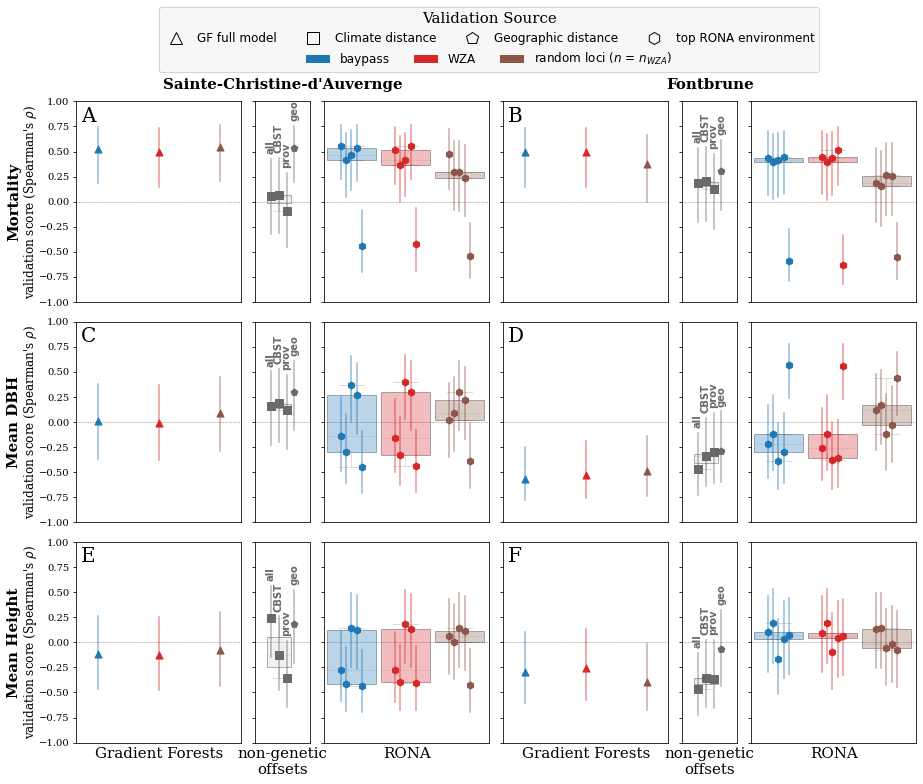

Function `jp_fig` completed after : 0-00:00:03


In [18]:
# create a nice lil fig
jp_fig()

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/jp_canonical_spearman_all-markers_boxplots_annotated.pdf


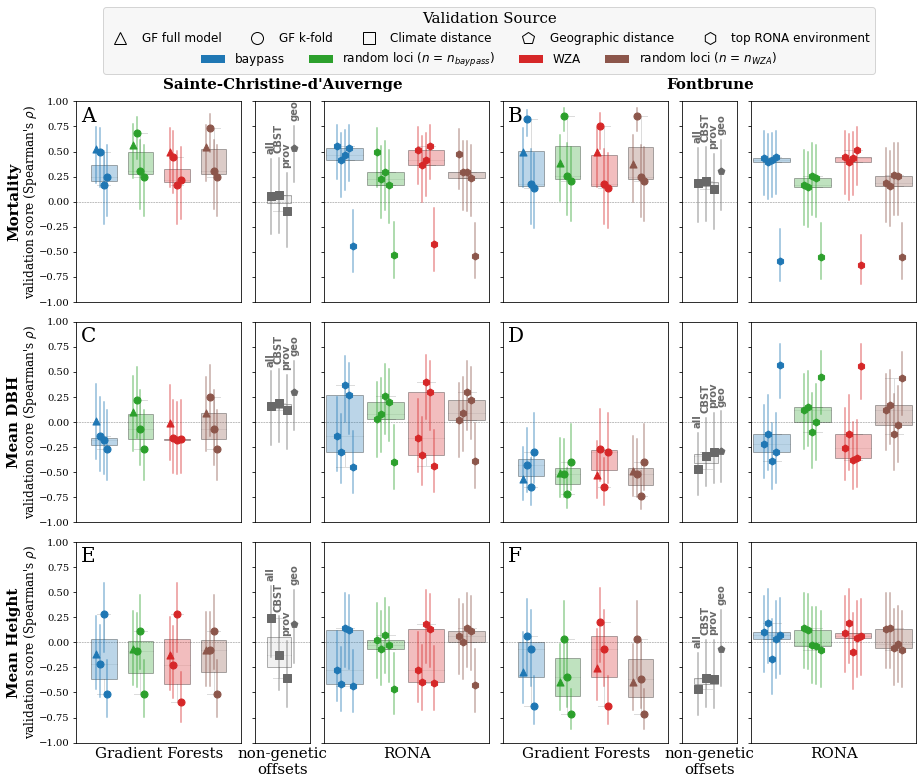

Function `jp_fig` completed after : 0-00:00:06


In [19]:
jp_fig(focus=False)

### CBST envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/jp_CBST_spearman_focus_boxplots_annotated.pdf


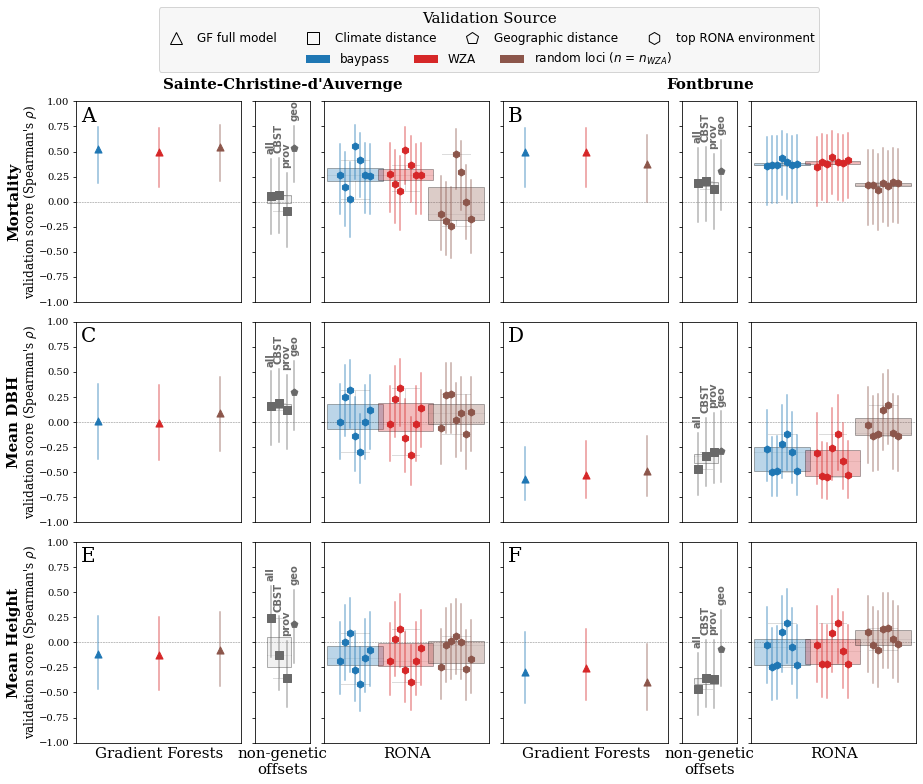

Function `jp_fig` completed after : 0-00:00:03


In [20]:
jp_fig(climate_set='CBST')

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/jp_CBST_spearman_all-markers_boxplots_annotated.pdf


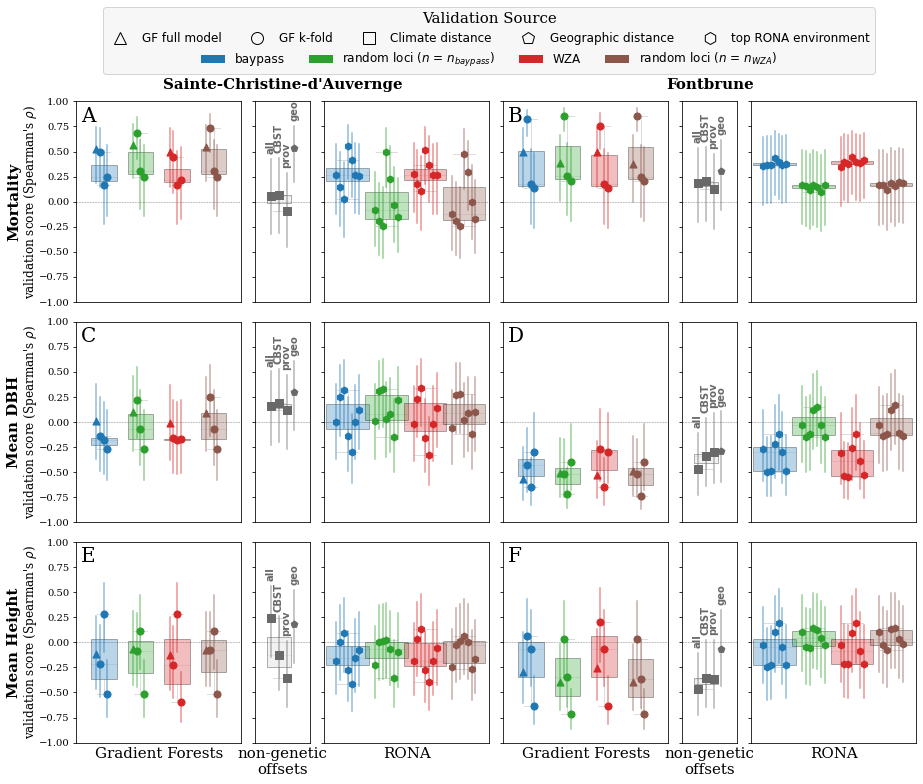

Function `jp_fig` completed after : 0-00:00:06


In [21]:
jp_fig(climate_set='CBST', focus=False)

### provenance trial envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/jp_provenance_trial_spearman_focus_boxplots_annotated.pdf


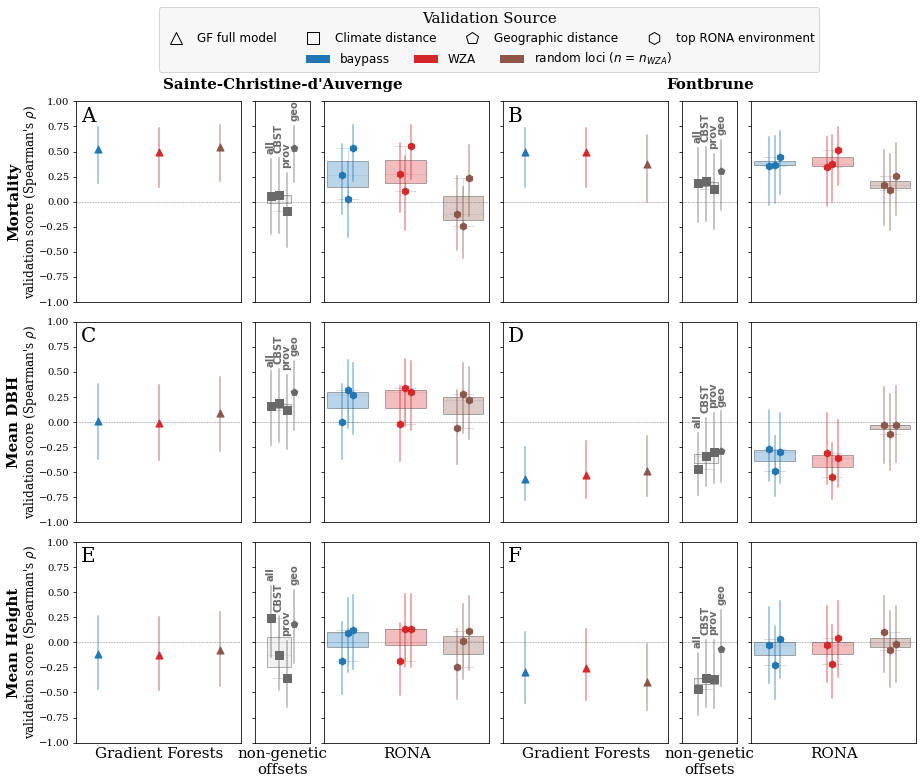

Function `jp_fig` completed after : 0-00:00:03


In [22]:
jp_fig(climate_set='provenance_trial')

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/jp_provenance_trial_spearman_all-markers_boxplots_annotated.pdf


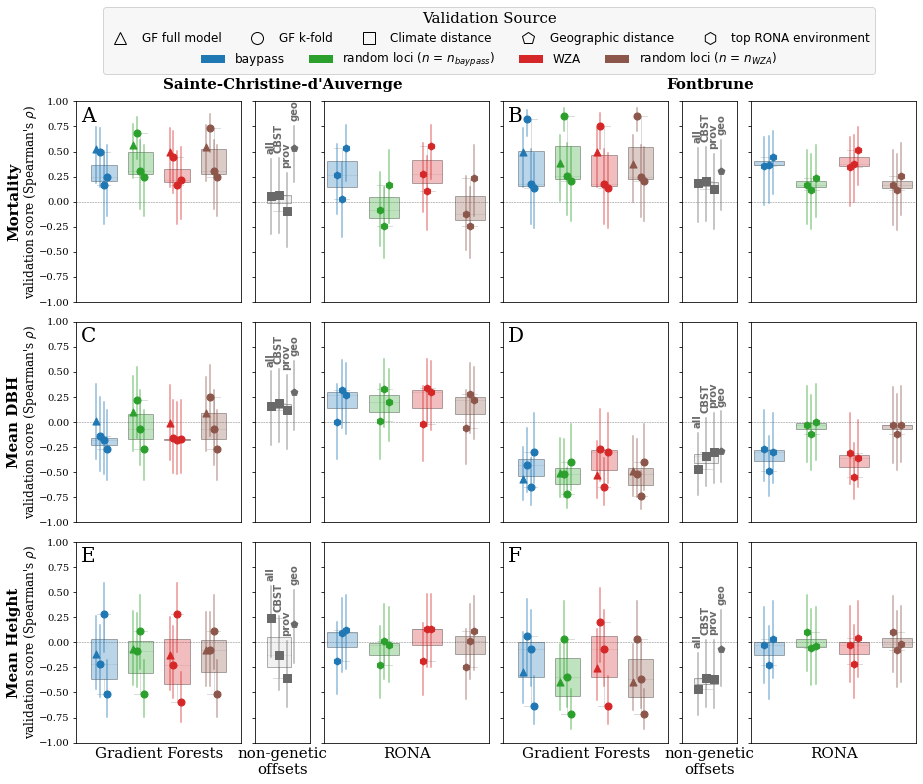

Function `jp_fig` completed after : 0-00:00:05


In [23]:
jp_fig(climate_set='provenance_trial', focus=False)

<a id='doug'></a>

# douglas-fir

[top](#home)

<a id='upper'></a>

## create douglas-fir figs validated at and above variety level

[top](#home)

In [24]:
def setup_df_fig(subgroups=False):
    """Create correct number of rows and subplots for Douglas-fir validation figures.
    
    Parameters
    ----------
    subgroups
        True if creating a 3row x 3col figure with figsize=13"w x 10"h (`df_fig`)
        False if creating a 1row x 4col figure with figsize=13"w x 3.33"h (`df_subgroup_fig()`)
    """
    if subgroups is False:
        fig, axes = plt.subplots(nrows=3,
                                 ncols=3,
                                 sharey=True,
                                 gridspec_kw={'width_ratios': [3, 1, 3]},
                                 figsize=(13, 10))
    else:
        # fig for interior subgroup validation
        fig, axes = plt.subplots(nrows=2,
                                 ncols=3,
                                 sharey=True,
                                 gridspec_kw={'width_ratios': [3, 1, 3]},
                                 figsize=(13, 6.7))
    
    return fig, axes

@timer
def df_fig(
    climate_set='canonical',
    pheno='blup_increment',
    validation_stat='spearman',
    focus=True,
    adjust=False,
    add_boxplot=True,
    annotate=True,
    save=True,
    panel_buffer=0.02
):
    """Create figure comparing GF, RONA, and non-genetic offset for main text validating with Douglas-fir.
    
    Notes
    -----
    - this is only for validating at the variety-level or cross-variety
        - for the validation at the sub-Interior variety see below - `df_subgroup_fig()`
    
    Parameters
    ----------
    climate_set
        key to `efdict` to retrieve the environments to use to calculate RONA
    pheno
        name of the phenotype to validate    
    validation_stat
        the validation statistic to use in the figure
    focus
        whether to use just the two outlier sets and wza-random or to use all marker sets
    adjust
        whether to try and algorithmically adjust text positions that label non-genetic offsets
        and RONA envs - I've used a bool arg so that I can set to False when debugging to speed
        up figure creation, then use default when creating the real figures
    add_boxplot
        whether to add a boxplot to zorder=0  that shows range of offset values
            - for GF, this is only the cross-validation scores
            - for RONA, this is all scores
    annotate
        whether to annotate with names the climate/geographic distances and envs of RONA
    save
        whether to save, saves to `fig_dir`
    panel_buffer
        spacing from xmin to place the panel label
    """
    marker_sets = ['baypass-real', 'wza-real', 'wza-random'] if focus is True else [
        marker_set for marker_set in keys(set_colors) if 'pseudo' not in marker_set
    ]
    
    # set up fig
    fig, axes = setup_df_fig(subgroups=False)
    
    # set up global vars
    garden = 'vancouver'
    validation_level = ['Cross-variety', 'Coastal variety', 'Interior variety']
    env_list = defaultdict(list)
#     env_list = []
    
    
    #### CROSS-VARIETY VALIDATION LEVEL ####
    # set up vars
    gf_ax, clim_ax, rona_ax = axes[0]
    spp = 'combined'
    envs = efdict[climate_set][spp][garden]
#     env_list.append(envs)
    env_list[0].append(envs)

    # get appropriate validation data
    rona_df = reduce_df(cordf, spp=spp, pheno=pheno, envs=envs)
    clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
    gf_df = reduce_df(validation_df, spp=spp, pheno=pheno, garden=garden, focus=focus)

    # phenotypic measurements - use to tally sample size for rho conf interval
    garden_phenos = phenodata[spp][garden][pheno]
    num_pops = garden_phenos.notnull().sum()

    # create gf plot
    plot_gradient_forests(
        gf_df, marker_sets, gf_ax, validation_stat, num_pops,
        add_boxplot=False if focus is True else True
    )
    
    # create climate/geo plot
    create_climgeo_fig(
        clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot
    )
    
    # create rona plot
    create_rona_fig(
        rona_df, marker_sets, num_pops, rona_ax, validation_stat, add_boxplot=add_boxplot
    )
    

    #### COASTAL and INTERIOR VARIETY VALIDATION LEVEL ####
    for row, spp in zip([1, 2], ['fdc', 'fdi']):
        gf_ax, clim_ax, rona_ax = axes[row]
        # GF plots
        for add, model in zip([0, len(marker_sets) + 1], [f'{spp}-combined', spp]):
            # phenotypic measurements - use to tally sample size for rho conf interval
            garden_phenos = phenodata[spp][garden][pheno]
            num_pops = garden_phenos.notnull().sum()
            
            # create gf plot
            gf_df = reduce_df(validation_df, model=model, pheno=pheno, focus=focus)  # get appropriate validation data
            plot_gradient_forests(
                gf_df, marker_sets, gf_ax, validation_stat, num_pops, add=add,
                add_boxplot=False if focus is True else True
            )
            
            # create rona plot
            envs = efdict[climate_set][spp][garden]
            env_list[row].append(envs)
            rona_df = reduce_df(cordf, spp=model, pheno=pheno, garden=garden, envs=envs) # get validation data
            create_rona_fig(
                rona_df, marker_sets, num_pops, rona_ax, validation_stat,
                add_boxplot=add_boxplot, add=add
            )
            
        # climate/geo
        clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
        create_climgeo_fig(
            clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot
        )
        
        
    # clean up fig    
    panel_count = 0
    for row, row_axes in enumerate(axes):
        for ax_num, ax in enumerate(row_axes):
            ax.set_ylim(-1, 1)  # set ylim
            ax.yaxis.set_ticks(np.arange(-1, 1.25, 0.25))
            plt.setp(ax.get_yticklabels(), family='serif')  # set ytick font
            # set reference line at validation_stat = y = 0
            ax.axhline(y=0, linestyle='--', zorder=0, alpha=0.5, color='k', linewidth=0.5)
            
            # for the non-genetic offset subplots: second subplots
            if ax_num == 1:
                xmin, xmax = (-2, 5)
                ax.set_xlim(xmin, xmax)
                # set xtick
                if row == 0:
                    xticklabel = 'non-genetic offset\ncross-variety training'
                elif row == 1:
                    xticklabel = 'non-genetic offset\ncoastal variety training'
                elif row == 2:
                    xticklabel = 'non-genetic offset\ninterior variety training'
                xpos = xmin + ((xmax - xmin) / 2)
                ax.set_xticks([xpos])
                ax.set_xticklabels([xticklabel])

            # for the RONA subplots - 3rd subplots
            if ax_num == 2:
                # set xlim
                envs = env_list[row][0]
                if row == 0:
                    xmax = len(marker_sets) - 1 + (0.1 * len(envs)) + 0.25
                else:
                    xmax = (2*len(marker_sets)) + (0.1 * len(envs)) + 0.25
                ax.set_xlim(-0.40, xmax)
                # set xticks and xticklabels
                xmin, xmax = ax.get_xlim()
                if row == 0:
                    xpos = xmin + ((xmax - xmin) / 2)
                    ax.set_xticks([xpos])
                    ax.set_xticklabels(['RONA\ncross-variety training'])
                else:
                    assert env_list[row][0] == env_list[row][1]
                    ax.set_xticks([
                        ((len(marker_sets) - 1 + (0.1 * len(envs))) / 2),
                        len(marker_sets) + ((len(marker_sets) + 1.5) / 2)
                    ])
                    if row == 1:
                        ax.set_xticklabels(['RONA\ncross-variety training',
                                            'RONA\ncoastal variety training'])
                    else:
                        ax.set_xticklabels(['RONA\ncross-variety training',
                                            'RONA\ninterior variety training'])


            # add panel labels and set xlim for the GF subplots
            if ax_num == 0:
                # set xlim
                xmin, xmax = ax.get_xlim()
                ax.set_xlim(xmin - 0.25, xmax + 0.25)

                # set xticklabels
                xmin, xmax = ax.get_xlim()
                if row == 0:
                    xpos = xmin + ((xmax - xmin) / 2)
                    ax.set_xticks([xpos])
                    ax.set_xticklabels(['Gradient Forests\ncross-variety training'])
                else:
                    ax.set_xticks([
                        ((len(marker_sets) - 1 + 0.5) / 2),  # 0.5 = 0.1 * n_kfold
                        len(marker_sets) + ((len(marker_sets) + 1.5) / 2)
                    ])
                    if row == 1:
                        ax.set_xticklabels(['Gradient Forests\ncross-variety training',
                                            'Gradient Forests\ncoastal variety training'])
                    else:
                        ax.set_xticklabels(['Gradient Forests\ncross-variety training',
                                            'Gradient Forests\ninterior variety training'])
                    
                # set panel label
                xmin, xmax = ax.get_xlim()
                xpos = xmin + (panel_buffer * (xmax - xmin))
                ax.text(  # df_fig mypanel
                    x=xpos, y=0.8, s=panel_labels[panel_count], fontdict=dict(family='serif', size=20)
                )
                panel_count += 1
            
            # adjust RONA-env and non-genetic labels as best I can so they don't overlap
            if adjust is True and annotate is True:
                annotations = [child for child in ax.get_children()
                               if isinstance(child, matplotlib.text.Annotation)]
                adjust_text(annotations, ax=ax, **adj_kwargs)
                
            # for the first plot of each row
            if ax_num == 0:
                # add y label
                ax.set_ylabel(pretty_label[validation_stat], labelpad=0.0,
                              fontdict=dict(size=12, family='serif'))
                # add validation level outside of ylabel
                xmin, xmax = ax.get_xlim()
                xpos = xmin - (0.208 * (xmax - xmin))
                ax.text(xpos, 0, validation_level[row], fontdict=dict(family='serif',
                                                                      rotation='vertical',
                                                                      verticalalignment='center',
                                                                      weight='bold',
                                                                      size=15))
                if (focus is True and row == 1) or (focus is False and row == 2):
                    xmin, xmax = ax.get_xlim()
                    xpos = xmin - (0.32 * (xmax - xmin))
                    ax.text(xpos, 0, 'Validation Level',
                            fontdict=dict(family='serif',
                                          rotation='vertical',
                                          verticalalignment='center',
                                          weight='bold',
                                          fontsize=20))
                    
#     # set validation level label
#     plt.figtext(-0.05, 0.24, 'Validation Level', rotation='vertical',
#                 fontdict=dict(family='serif', fontsize=20, weight='bold'))
        
    plt.tight_layout()
    
    # add legend
    add_legend(axes[0], marker_sets, jp_fig=False)
    
    if save is True:
        focussed = 'focus' if focus is True else 'all-markers'
        boxplots = 'boxplots' if add_boxplot is True else 'no-boxplot'
        annotated = 'annotated' if annotate is True else 'not-annotated'
        saveloc = op.join(figdir,
                          f'df_{climate_set}_{pheno}_{validation_stat}_{focussed}_{boxplots}_{annotated}_upper.pdf')
        save_pdf(saveloc)
    
    plt.show()
    
    # now make the sub-interior figure ...
    
    pass


### outlier and wza random marker sets

##### rona with canonical envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_increment_spearman_focus_boxplots_annotated_upper.pdf


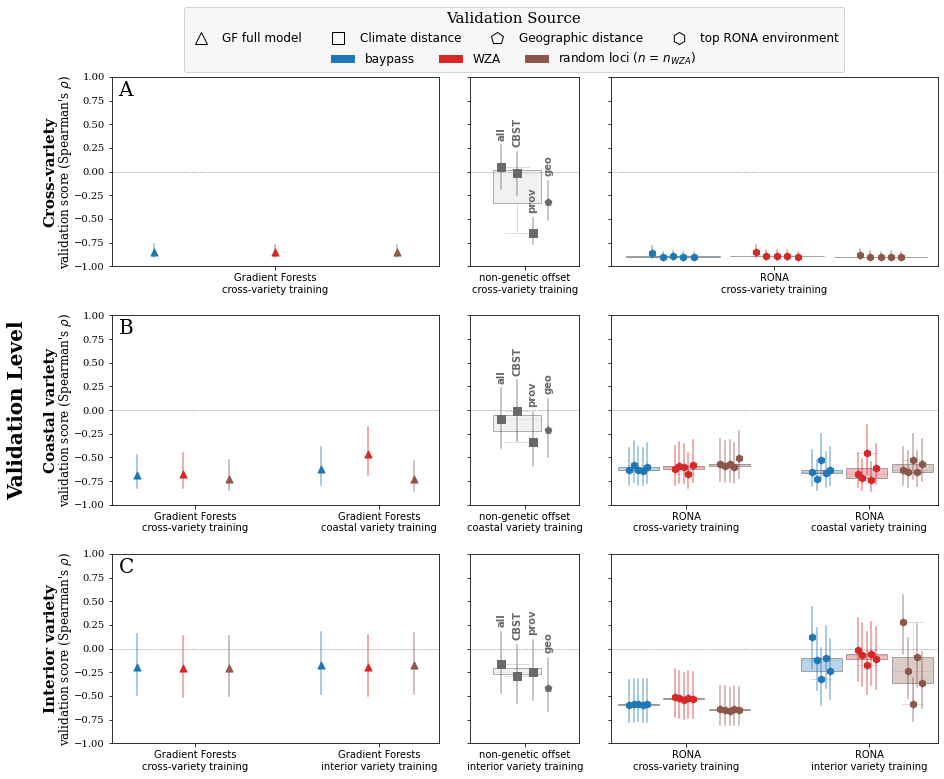

Function `df_fig` completed after : 0-00:00:02


In [25]:
df_fig(climate_set='canonical')

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_shoot_biomass_spearman_focus_boxplots_annotated_upper.pdf


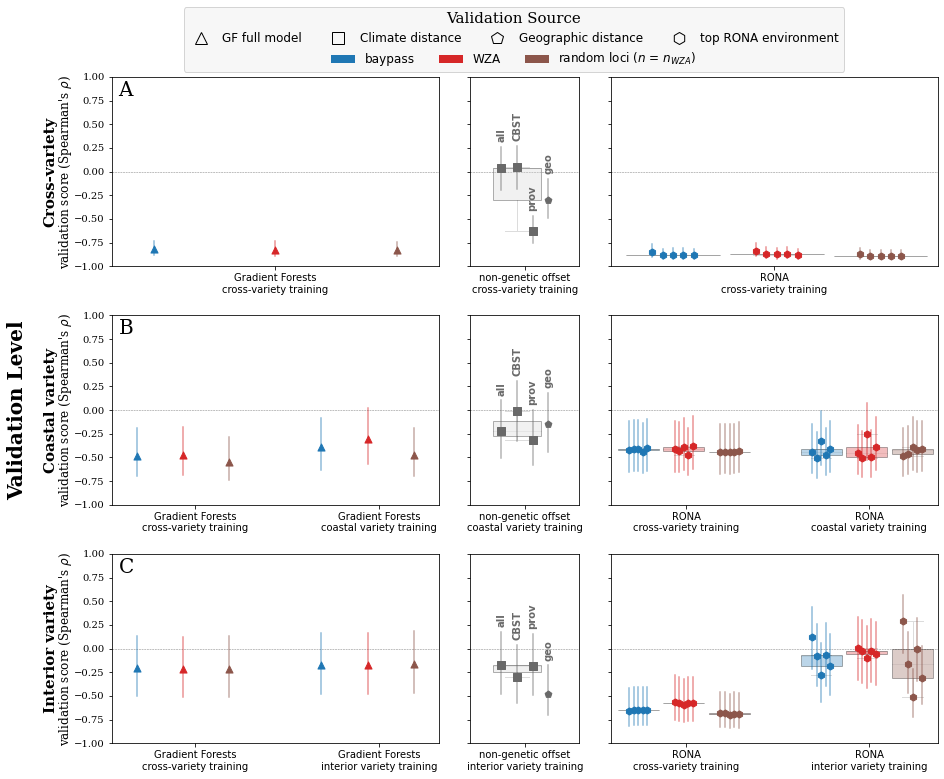

Function `df_fig` completed after : 0-00:00:02


In [26]:
df_fig(climate_set='canonical', pheno='blup_shoot_biomass')

##### rona with CBST envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_increment_spearman_focus_boxplots_annotated_upper.pdf


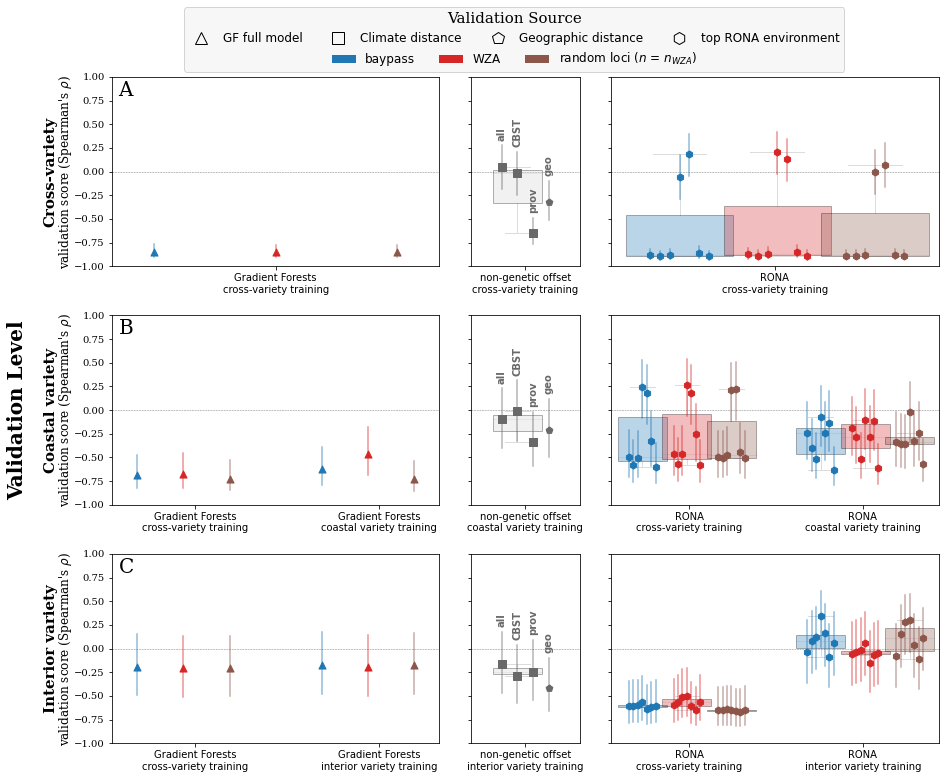

Function `df_fig` completed after : 0-00:00:02


In [27]:
df_fig(climate_set='CBST')

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_shoot_biomass_spearman_focus_boxplots_annotated_upper.pdf


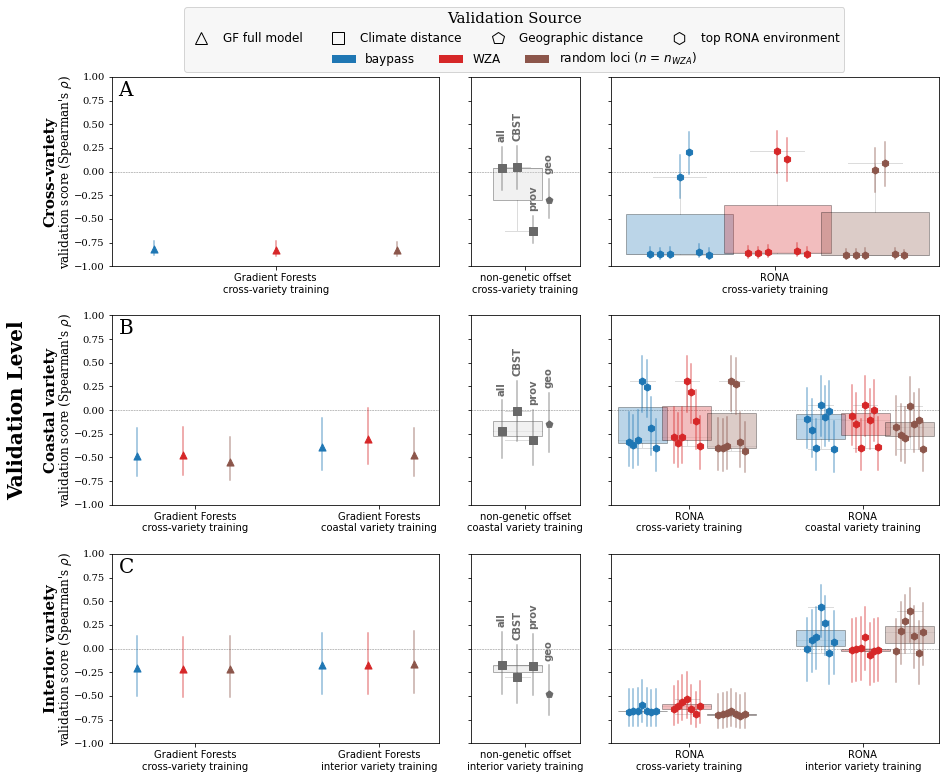

Function `df_fig` completed after : 0-00:00:02


In [28]:
df_fig(climate_set='CBST', pheno='blup_shoot_biomass')

##### rona with provenance trial envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_increment_spearman_focus_boxplots_annotated_upper.pdf


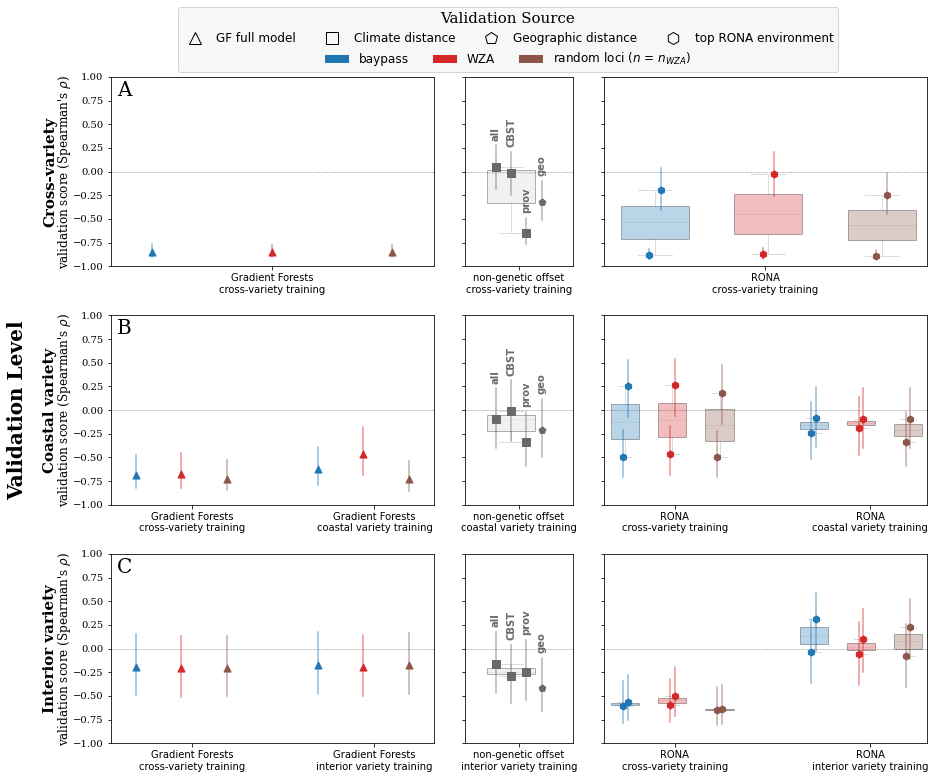

Function `df_fig` completed after : 0-00:00:02


In [29]:
df_fig(climate_set='provenance_trial')

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_shoot_biomass_spearman_focus_boxplots_annotated_upper.pdf


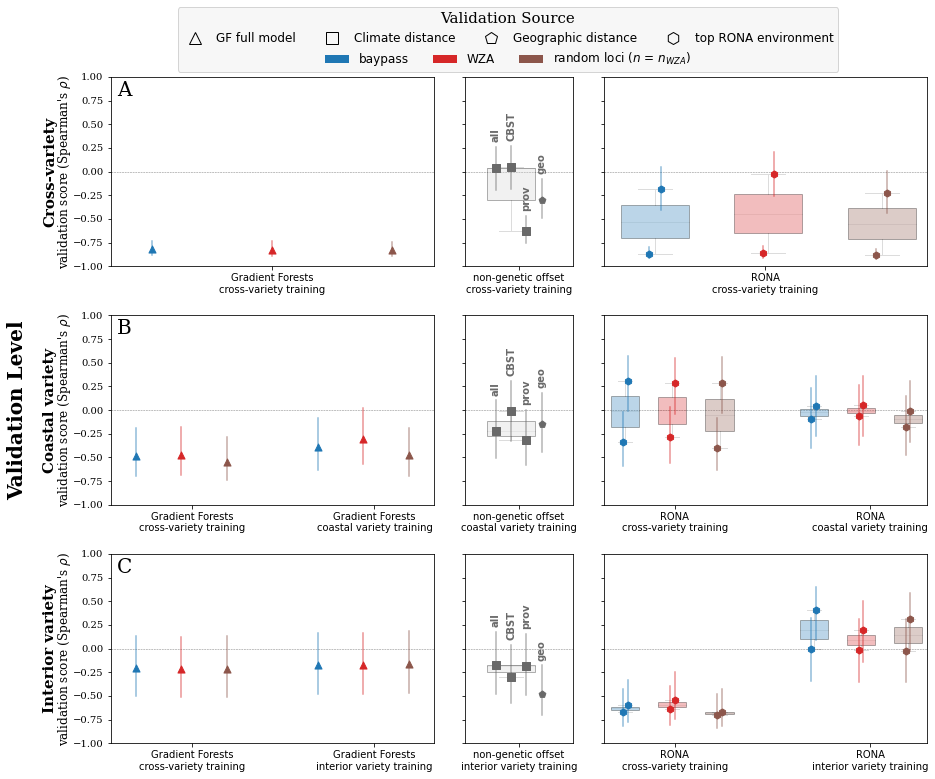

Function `df_fig` completed after : 0-00:00:02


In [30]:
df_fig(climate_set='provenance_trial', pheno='blup_shoot_biomass')

### all marker sets

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_increment_spearman_all-markers_boxplots_annotated_upper.pdf


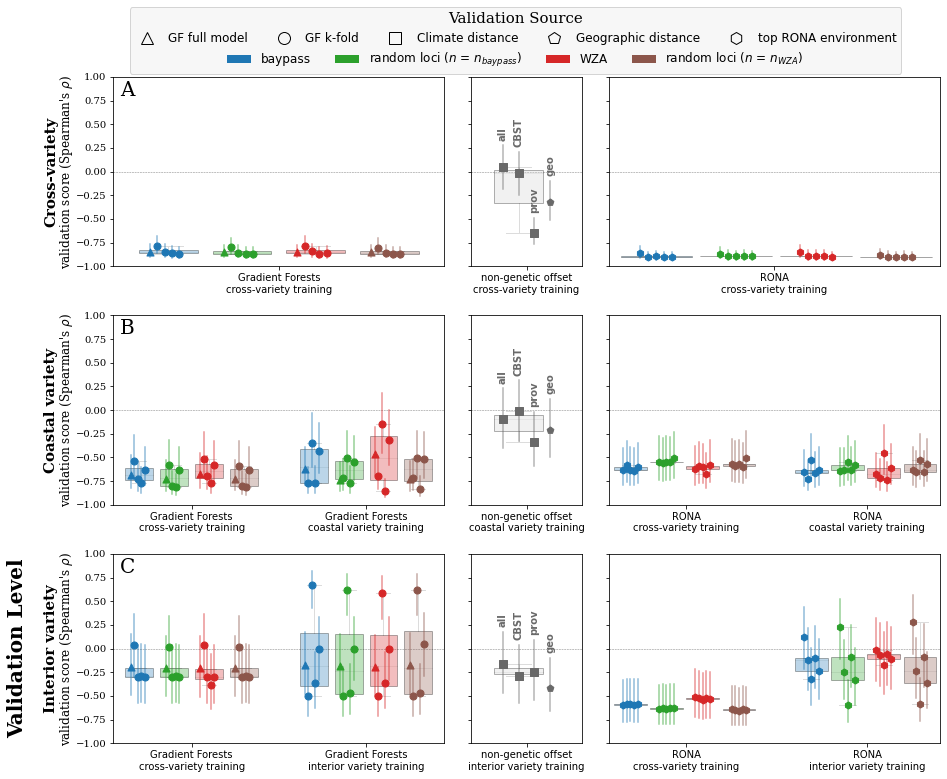

Function `df_fig` completed after : 0-00:00:04
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_shoot_biomass_spearman_all-markers_boxplots_annotated_upper.pdf


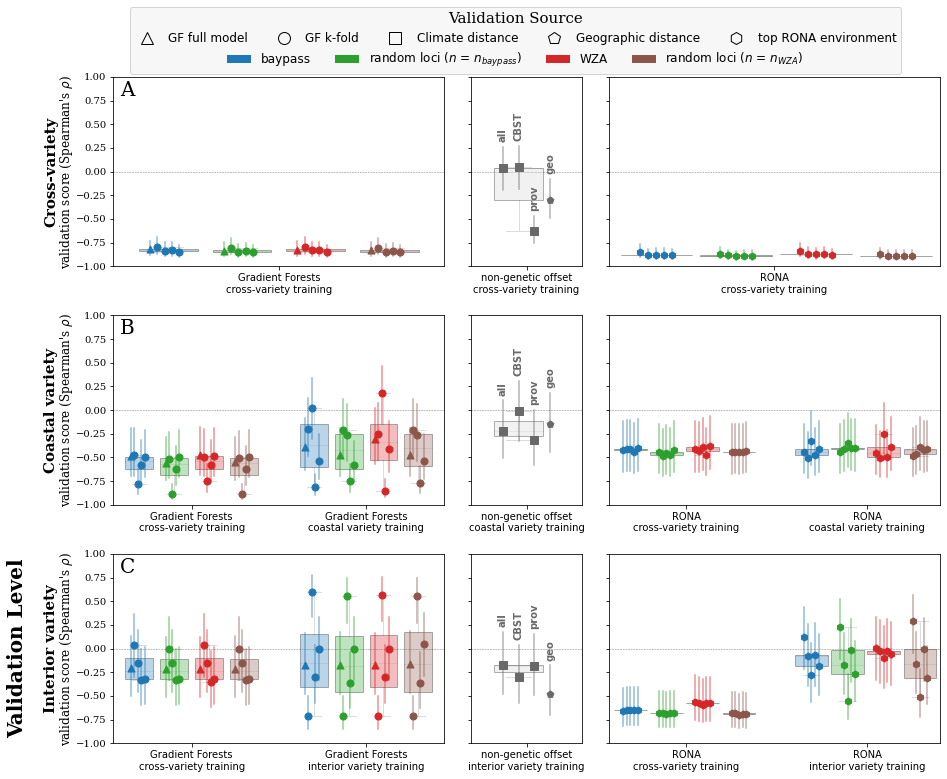

Function `df_fig` completed after : 0-00:00:04
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_increment_spearman_all-markers_boxplots_annotated_upper.pdf


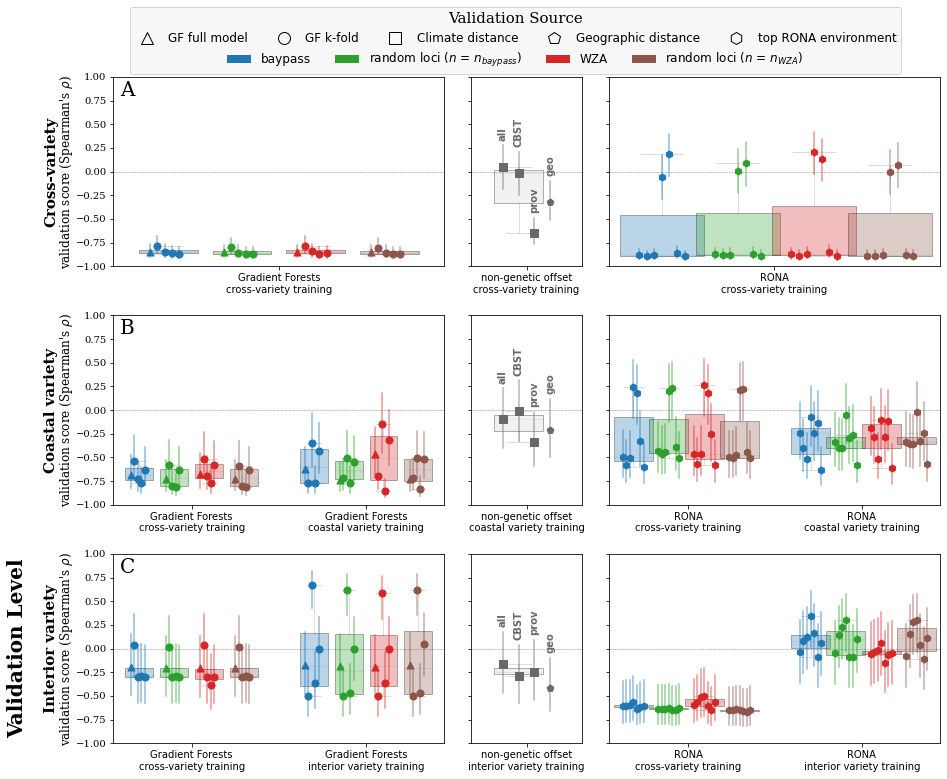

Function `df_fig` completed after : 0-00:00:04
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_shoot_biomass_spearman_all-markers_boxplots_annotated_upper.pdf


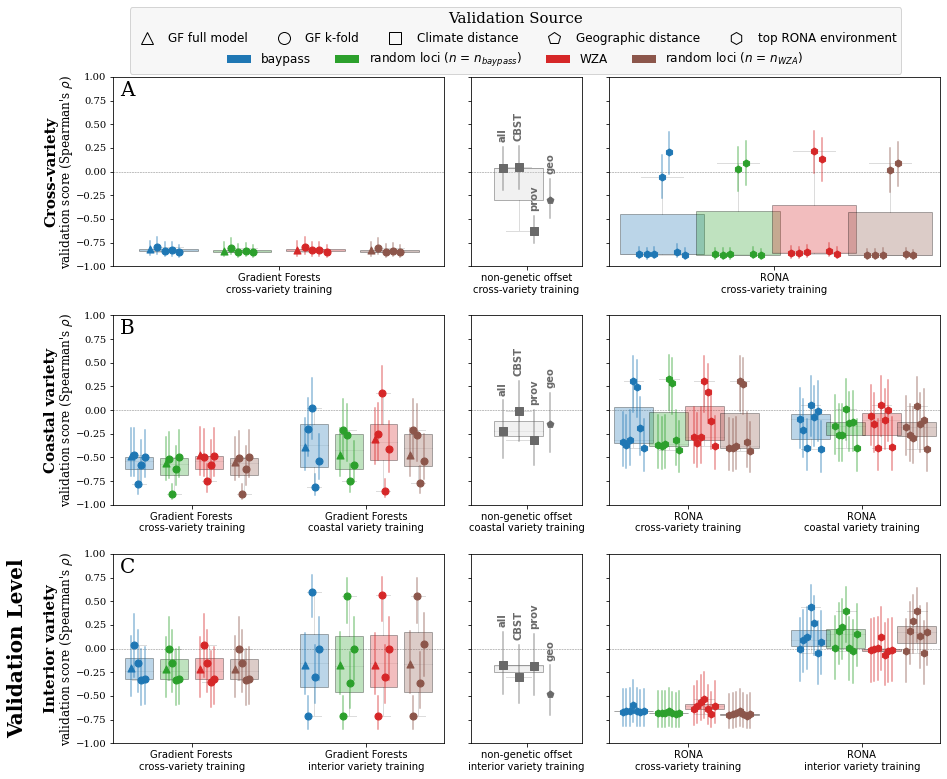

Function `df_fig` completed after : 0-00:00:05
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_increment_spearman_all-markers_boxplots_annotated_upper.pdf


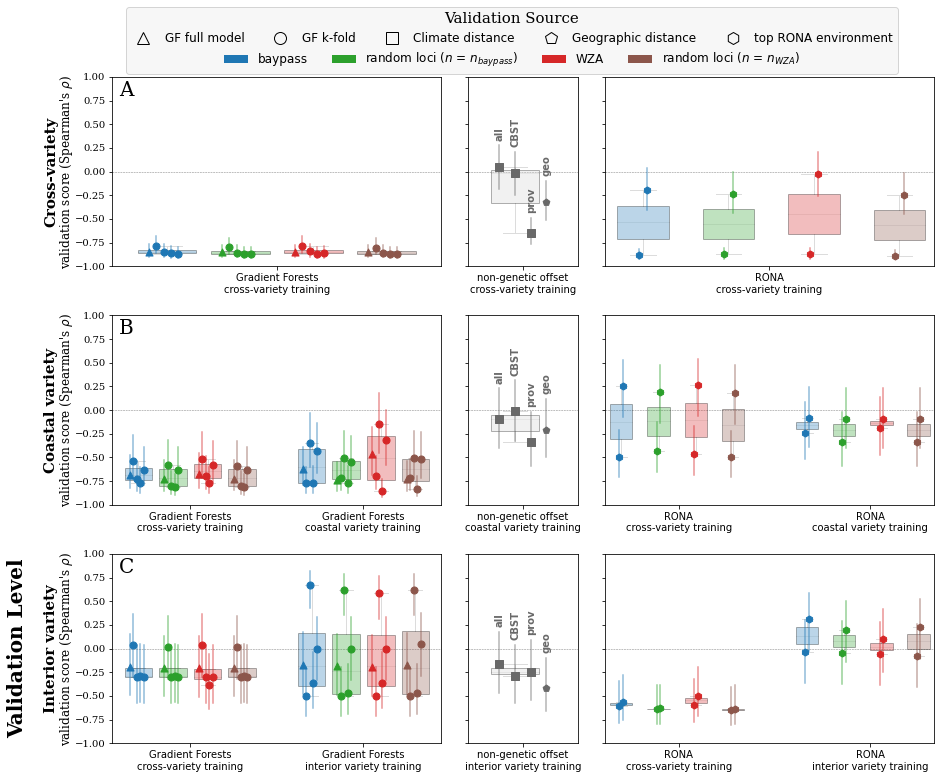

Function `df_fig` completed after : 0-00:00:04
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_shoot_biomass_spearman_all-markers_boxplots_annotated_upper.pdf


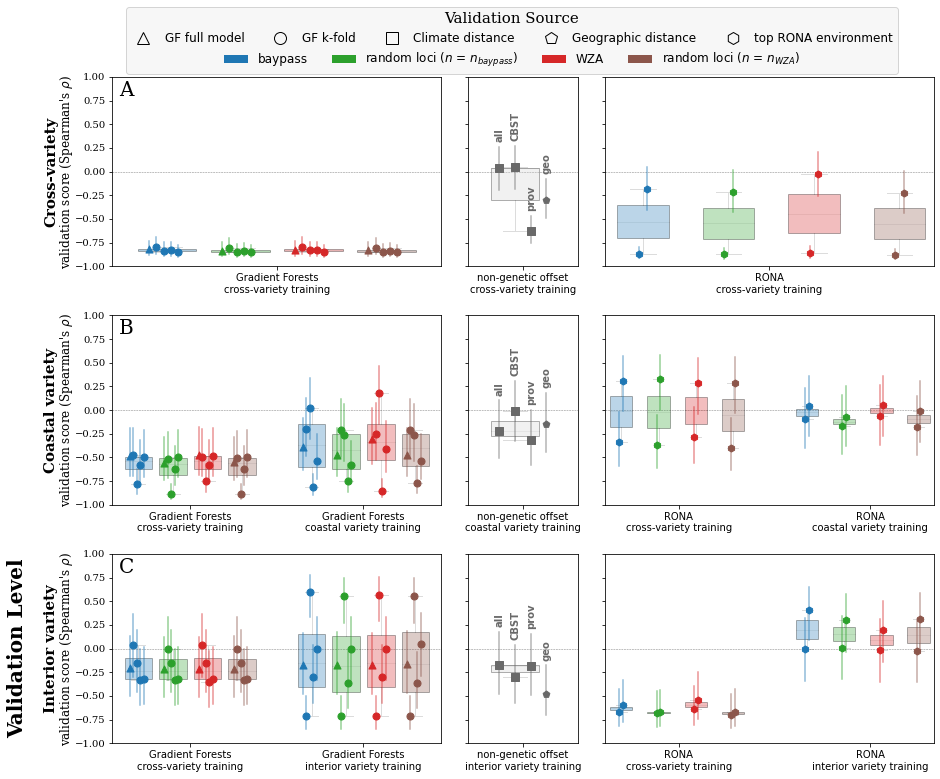

Function `df_fig` completed after : 0-00:00:04


In [31]:
for climate_set in ['canonical', 'CBST', 'provenance_trial']:
    for pheno in ['blup_increment','blup_shoot_biomass']:
        df_fig(climate_set=climate_set,
               pheno=pheno,
               focus=False)

<a id='subset'></a>
## create figs validated at sub-interior variety level (genetic group level)

[top](#home)

In [32]:
# copied from output of cell [9] from 11_validate_GF_offset_predictions.ipynb
genetic_groups = {
    'eastern': ['DF_p3', 'DF_p5', 'DF_p18', 'DF_p19', 'DF_p20', 'DF_p33', 'DF_p34',
                'DF_p37', 'DF_p46', 'DF_p47', 'DF_p54', 'DF_p55', 'DF_p56', 'DF_p57',
                'DF_p58', 'DF_p59', 'DF_p60', 'DF_p61', 'DF_p62'],
    'western': ['DF_p4', 'DF_p7', 'DF_p8', 'DF_p9', 'DF_p35', 'DF_p36', 'DF_p38',
                'DF_p39', 'DF_p40', 'DF_p41', 'DF_p42', 'DF_p43', 'DF_p44', 'DF_p45',
                'DF_p48', 'DF_p49']
}

In [47]:
@timer
def df_subgroup_fig(
    climate_set='canonical',
    pheno='blup_increment',
    validation_stat='spearman',
    focus=True,
    adjust=False,
    add_boxplot=True,
    annotate=True,
    save=True,
    panel_buffer=0.02
):
    """Create figure comparing GF, RONA, and non-genetic offset for main text validating with Douglas-fir.
    
    Notes
    -----
    - this is only for validating at the sub-Interior variety
        - for the validation at the variety-level or cross-variety see above - `df_fig()`
    
    Parameters
    ----------
    climate_set
        key to `efdict` to retrieve the environments to use to calculate RONA
    pheno
        name of the phenotype to validate    
    validation_stat
        the validation statistic to use in the figure
    focus
        whether to use just the two outlier sets and wza-random or to use all marker sets
    adjust
        whether to try and algorithmically adjust text positions that label non-genetic offsets
        and RONA envs - I've used a bool arg so that I can set to False when debugging to speed
        up figure creation, then use default when creating the real figures
    add_boxplot
        whether to add a boxplot to zorder=0  that shows range of offset values
            - for GF, this is only the cross-validation scores
            - for RONA, this is all scores
    annotate
        whether to annotate with names the climate/geographic distances and envs of RONA
    save
        whether to save, saves to `fig_dir`
    panel_buffer
        spacing from xmin to place the panel label (D or E)
    """
    
    marker_sets = ['baypass-real', 'wza-real', 'wza-random'] if focus is True else [
        marker_set for marker_set in keys(set_colors) if 'pseudo' not in marker_set
    ]
    
    # set up fig
    fig, axes = setup_df_fig(subgroups=True)
    
    # set up global vars
    garden = 'vancouver'
    validation_level = ['western', 'eastern']
    env_list = defaultdict(list)
    pretty_validation = {'western' : 'Northwestern Interior', 'eastern' : 'Southeastern Interior'}
    panel_labels = ['D', 'E']
    
    # create figs for western and eastern groups
    for row, spp in enumerate(validation_level):
        # get plot axes
        gf_ax, clim_ax, rona_ax = axes[row]
        
        # phenotypic measurements - use to tally sample size for rho conf interval
        garden_phenos = phenodata['fdi'][garden][pheno]
        num_pops = garden_phenos[
            garden_phenos.index.isin(genetic_groups['western'])
        ].notnull().sum()
        
        # plot GF scores
        for add, model in zip([0, len(marker_sets) + 1], [f'{spp}-combined', f'{spp}-fdi']):
            # get appropriate GF validation data
            gf_df = reduce_df(validation_df, spp=spp, pheno=pheno, garden=garden, model=model, focus=focus)

            # create gf plot
            plot_gradient_forests(
                gf_df, marker_sets, gf_ax, validation_stat, num_pops, add=add,
                add_boxplot=False if focus is True else True
            )
            
            # create rona plot
            envs = efdict[climate_set]['fdi'][garden]
            env_list[row].append(envs)
            rona_df = reduce_df(cordf, spp=model, pheno=pheno, garden=garden, envs=envs)  # godzilla
            create_rona_fig(
                rona_df, marker_sets, num_pops, rona_ax, validation_stat, add_boxplot=add_boxplot, add=add
            )

        # get appropriate climate/geo validation data and plot
        clim_df = reduce_df(climate_geodf, spp=spp, pheno=pheno, garden=garden)
        create_climgeo_fig(
            clim_df, num_pops, clim_ax, validation_stat, add_boxplot=add_boxplot, annotate=annotate
        )
        
    # clean up fig
    for row, row_axes in enumerate(axes):
        for ax_num, ax in enumerate(row_axes):
            ax.set_ylim(-1, 1)
            ax.yaxis.set_ticks(np.arange(-1, 1.25, 0.25))
            plt.setp(ax.get_yticklabels(), family='serif')

            # set reference line at validation_stat = y = 0
            ax.axhline(y=0, linestyle='--', zorder=0, alpha=0.5, color='k', linewidth=0.5)

            # for the GF offset plots
            gf_labels = ['cross-variety training', 'interior variety training']
            if ax_num == 0:
                # set xlim
                xmin, xmax = ax.get_xlim()
                ax.set_xlim(xmin - 0.25, xmax + 0.25)

                # set x tick labels
                ax.set_xticks([
                    ((len(marker_sets) - 1 + 0.5) / 2),  # 0.5 = 0.1 * n_kfold
                    len(marker_sets) + ((len(marker_sets) + 1.5) / 2)
                ])
                ax.set_xticklabels(['Gradient Forests\ncross-variety training',
                                    'Gradient Forests\ninterior variety training'])

                # set ylabel
                ax.set_ylabel(pretty_label[validation_stat], labelpad=0.0,
                              fontdict=dict(size=12, family='serif'))

                # add validation level outside of ylabel
                xmin, xmax = ax.get_xlim()
                xpos = xmin - (0.208 * (xmax - xmin))
                ax.text(xpos, 0, pretty_validation[validation_level[row]],
                        fontdict=dict(family='serif',
                                      rotation='vertical',
                                      verticalalignment='center',
                                      weight='bold',
                                      size=15))

                # set panel label - df_subgroup_fig
                xpos = xmin + (panel_buffer * (xmax - xmin))
                ax.text(  # mypanel
                    x=xpos, y=0.8, s=panel_labels[row], fontdict=dict(family='serif', size=20)
                )
                
                if row == 0:
                    # set a blank space to squish fig horizontally like `df_fig()` w/ "Validation Level"
                    xmin, xmax = ax.get_xlim()
                    xpos = xmin - (0.32 * (xmax - xmin))
                    ax.text(xpos, 0, ' ',
                            fontdict=dict(family='serif',
                                          rotation='vertical',
                                          verticalalignment='center',
                                          weight='bold',
                                          fontsize=20))


            # for the climate/geo plots
            if ax_num == 1:
                # set xlim
                xmin, xmax = (-2, 5)
                ax.set_xlim(xmin, xmax)
                # set x label
                xpos = xmin + ((xmax - xmin) / 2)
                ax.set_xticks([xpos])
                if ax_num == 1:
                    xticklabel = 'Northwestern training'
                else:
                    xticklabel = 'Southeastern training'
                ax.set_xticklabels([f'non-genetic offsets\n{xticklabel}'])

            # label second genetic group and label panel
            if ax_num == 2:
                envs = env_list[row][0]
                xmax = (2*len(marker_sets)) + (0.1 * len(envs)) + 0.25
                ax.set_xlim(-0.40, xmax)
                # set xticks and xticklabels
                xmin, xmax = ax.get_xlim()
                ax.set_xticks([
                    ((len(marker_sets) - 1 + (0.1 * len(envs))) / 2),
                    len(marker_sets) + ((len(marker_sets) + 1.5) / 2)
                ])
                ax.set_xticklabels(['RONA\ncross-variety training',
                                    'RONA\ninterior variety training'])
                
    plt.tight_layout()
    
    if save is True:
        focussed = 'focus' if focus is True else 'all-markers'
        boxplots = 'boxplots' if add_boxplot is True else 'no-boxplot'
        annotated = 'annotated' if annotate is True else 'not-annotated'
        saveloc = op.join(
            figdir,
            f'df_{climate_set}_{pheno}_{validation_stat}_{focussed}_{boxplots}_{annotated}_lower.pdf')
        save_pdf(saveloc)

    plt.show()
        
    pass

### outlier and wza random marker sets

##### rona with canonical envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_increment_spearman_focus_boxplots_annotated_lower.pdf


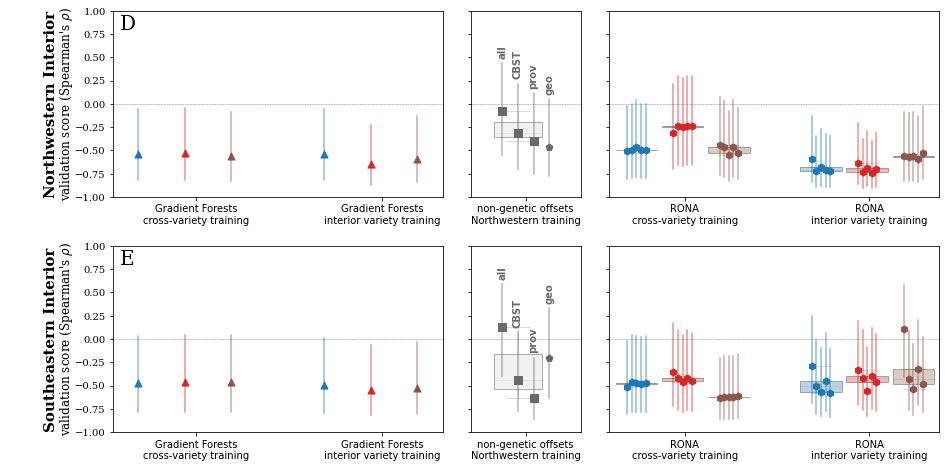

Function `df_subgroup_fig` completed after : 0-00:00:01


In [48]:
df_subgroup_fig()

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_shoot_biomass_spearman_focus_boxplots_annotated_lower.pdf


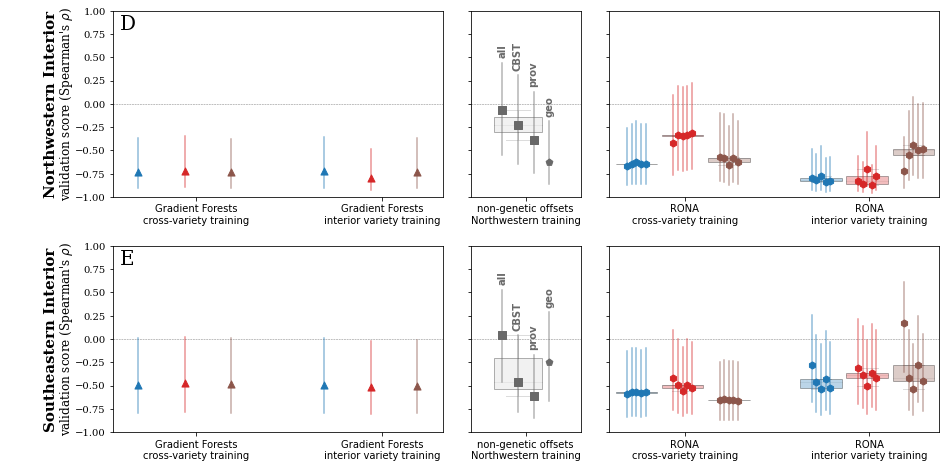

Function `df_subgroup_fig` completed after : 0-00:00:01


In [49]:
df_subgroup_fig(pheno='blup_shoot_biomass')

##### rona with CBST envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_increment_spearman_focus_boxplots_annotated_lower.pdf


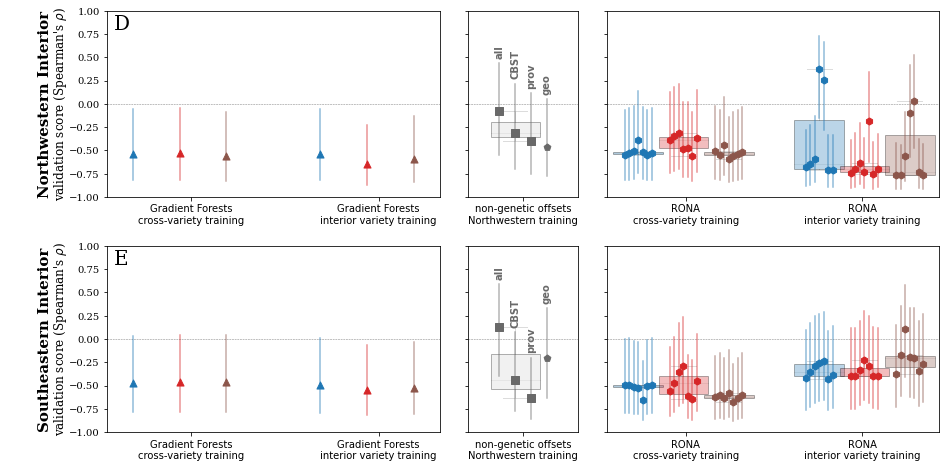

Function `df_subgroup_fig` completed after : 0-00:00:01


In [36]:
df_subgroup_fig(climate_set='CBST')    

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_shoot_biomass_spearman_focus_boxplots_annotated_lower.pdf


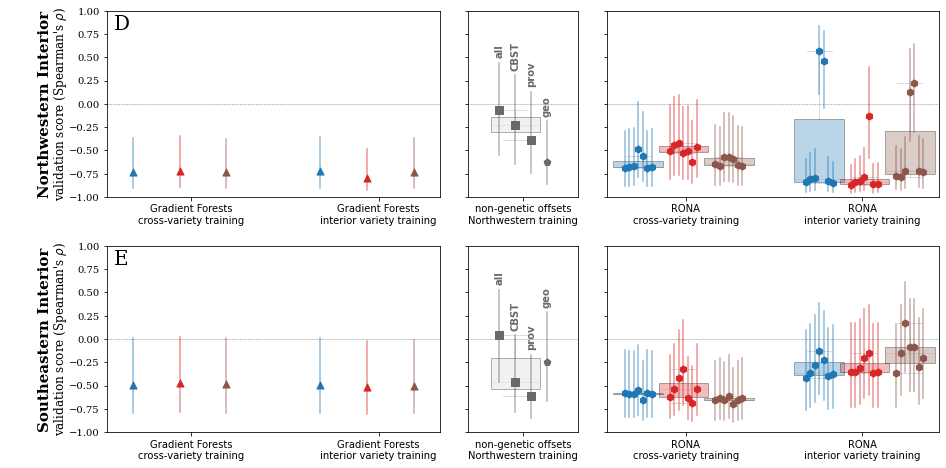

Function `df_subgroup_fig` completed after : 0-00:00:01


In [37]:
df_subgroup_fig(climate_set='CBST', pheno='blup_shoot_biomass')

##### rona with provenance envs

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_increment_spearman_focus_boxplots_annotated_lower.pdf


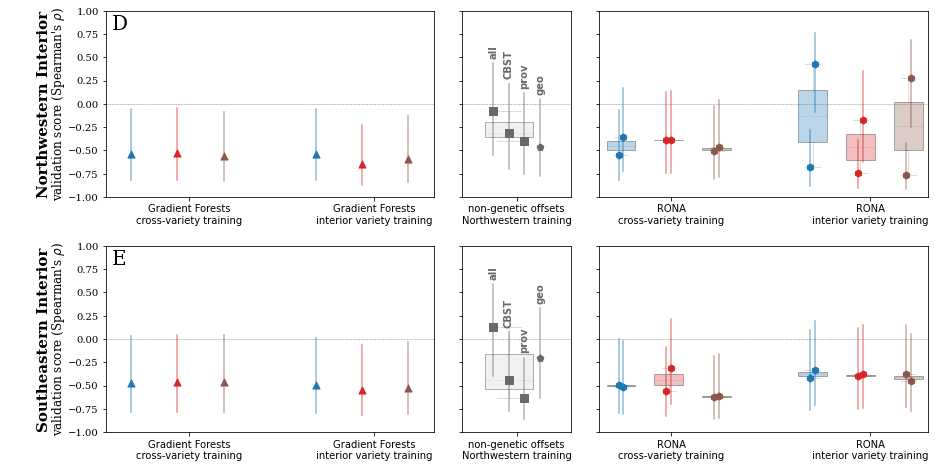

Function `df_subgroup_fig` completed after : 0-00:00:01


In [38]:
df_subgroup_fig(climate_set='provenance_trial')

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_shoot_biomass_spearman_focus_boxplots_annotated_lower.pdf


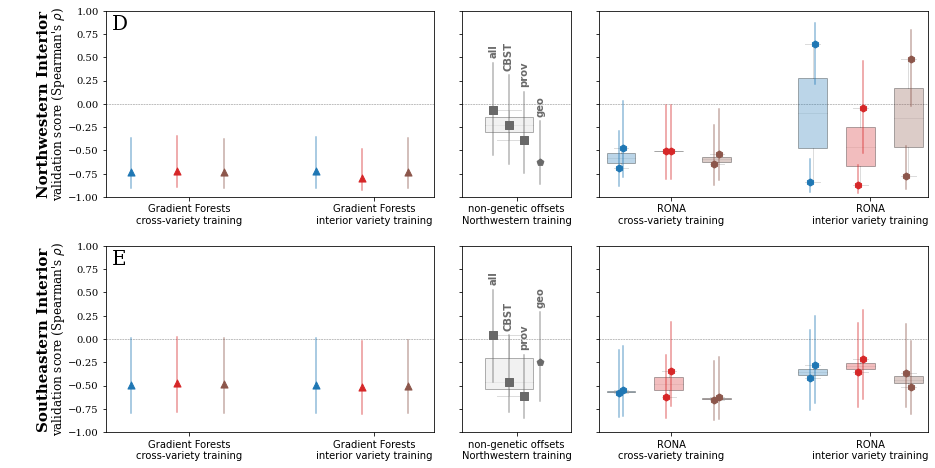

Function `df_subgroup_fig` completed after : 0-00:00:01


In [39]:
df_subgroup_fig(climate_set='provenance_trial', pheno='blup_shoot_biomass')

### all marker sets

##### rona with canonical envs

rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_increment_spearman_all-markers_boxplots_annotated_lower.pdf


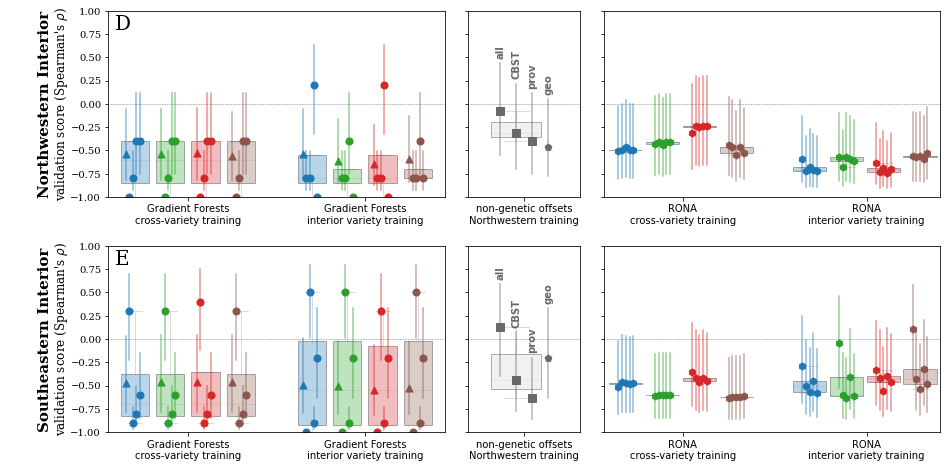

Function `df_subgroup_fig` completed after : 0-00:00:03


In [40]:
df_subgroup_fig(focus=False)

rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_canonical_blup_shoot_biomass_spearman_all-markers_boxplots_annotated_lower.pdf


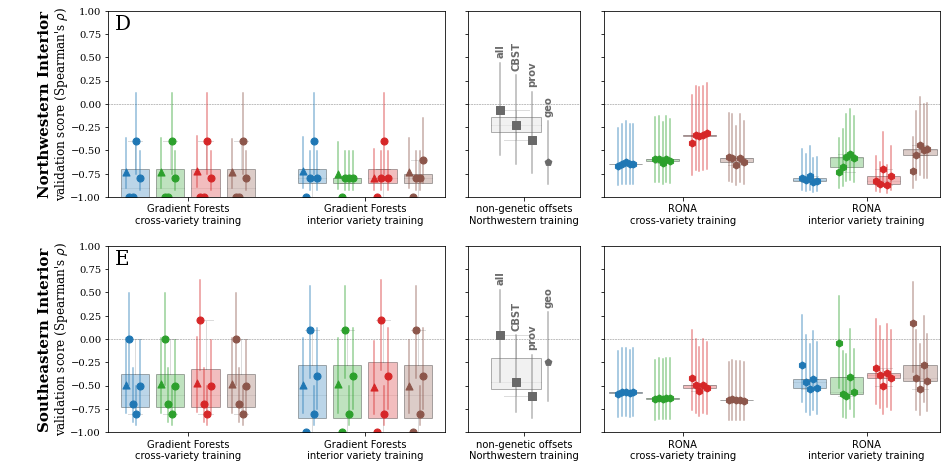

Function `df_subgroup_fig` completed after : 0-00:00:03


In [41]:
df_subgroup_fig(focus=False, pheno='blup_shoot_biomass')

##### rona with CBST envs

rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_increment_spearman_all-markers_boxplots_annotated_lower.pdf


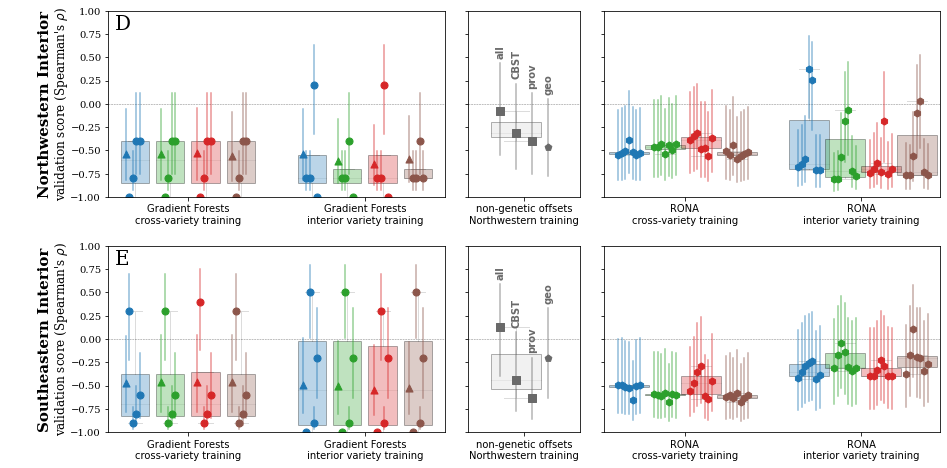

Function `df_subgroup_fig` completed after : 0-00:00:03


In [42]:
df_subgroup_fig(focus=False, climate_set='CBST')    

rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_CBST_blup_shoot_biomass_spearman_all-markers_boxplots_annotated_lower.pdf


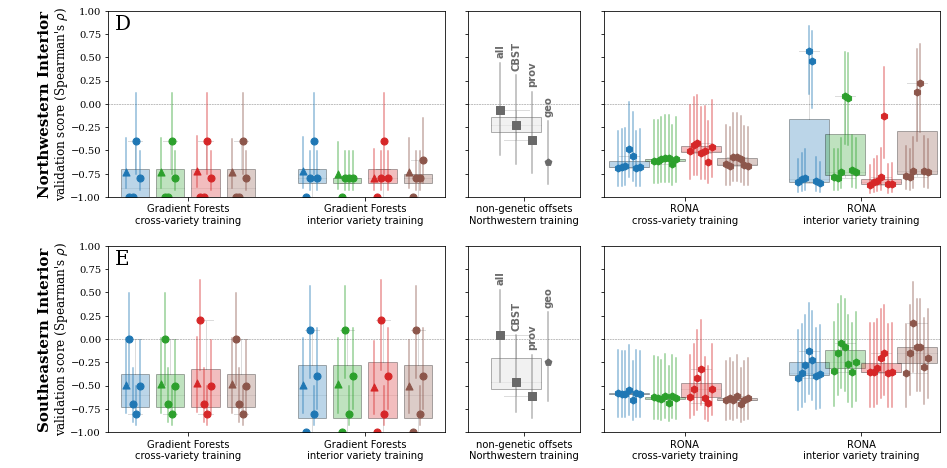

Function `df_subgroup_fig` completed after : 0-00:00:03


In [43]:
df_subgroup_fig(focus=False, climate_set='CBST', pheno='blup_shoot_biomass')

##### rona with provenance envs

rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_increment_spearman_all-markers_boxplots_annotated_lower.pdf


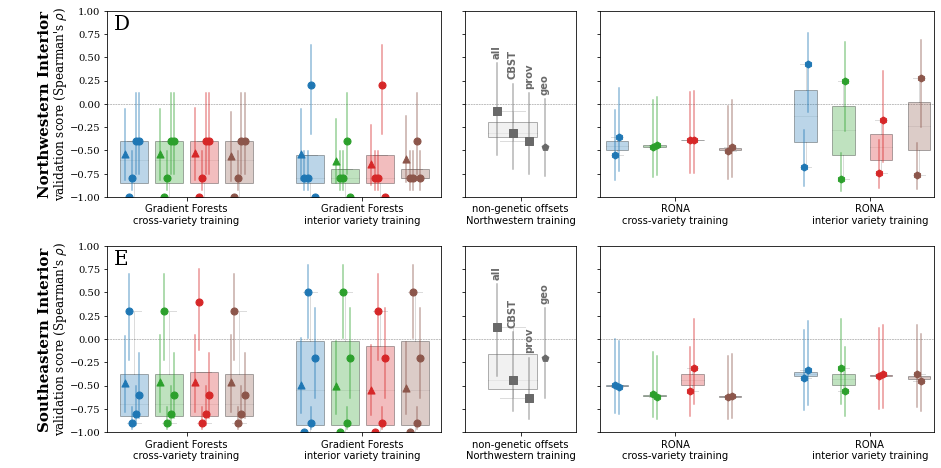

Function `df_subgroup_fig` completed after : 0-00:00:02


In [44]:
df_subgroup_fig(focus=False, climate_set='provenance_trial')

rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
rho changed from -1.0 to -0.9999999999999999
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/raw_validation/df_provenance_trial_blup_shoot_biomass_spearman_all-markers_boxplots_annotated_lower.pdf


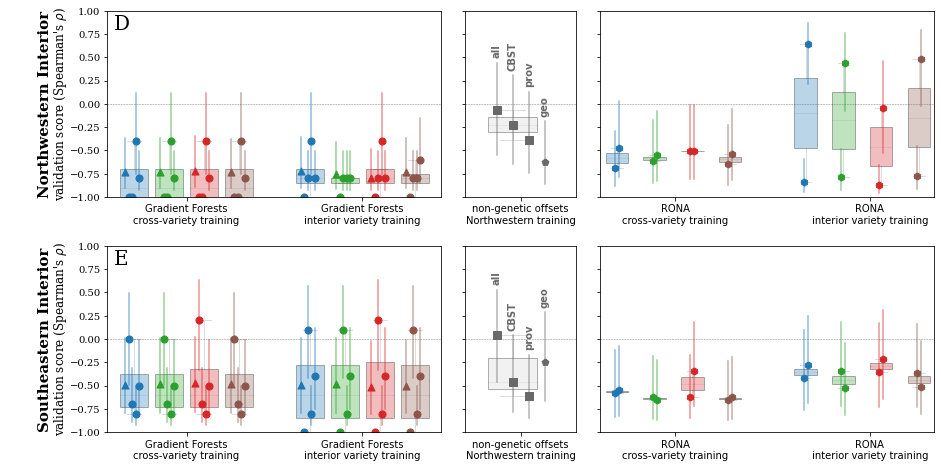

Function `df_subgroup_fig` completed after : 0-00:00:03


In [45]:
df_subgroup_fig(focus=False, climate_set='provenance_trial', pheno='blup_shoot_biomass')

In [46]:
formatclock(dt.now() - t1, exact=True)

'0-00:01:44'

<a id='bottom'></a>

# bottom of notebook

[top](#home)